# Import libraries

In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter
import seaborn as sns
import matplotlib
from scipy import stats

import functions

# Import Data

In [2]:
results_df = pd.read_csv("./../data/training_results_languages_metadat.tsv", sep="\t", index_col=0)

In [3]:
results_df

,eval/f1_macro,test:test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,in_Latin_script?
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,1,431808,False,False,True
bert-base-multilingual-cased_sequence_division_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.711125,0.712165,NaN,division,TUR,finished,-,versae,NaN,2021-11-08T10:41:48.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,1,431808,False,False,True
bert-base-multilingual-cased_sequence_testament_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.930773,0.934461,NaN,testament,TUR,finished,-,versae,NaN,2021-11-08T03:02:27.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,1,431808,False,False,True
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.576378,0.611678,NaN,division,XKL,finished,-,versae,NaN,2021-11-08T10:46:01.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,0,0,False,False,True
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bert-base-multilingual-cased_sequence_genre_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.630421,0.627669,NaN,genre,ARA,finished,-,versae,NaN,2021-11-08T03:26:36.000Z,...,Semitic,Semitic,Arabic alphabet,Q13955,Asia,1,1140422,False,False,False
bert-base-multilingual-cased_sequence_testament_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.892326,0.895786,NaN,testament,ARA,finished,-,versae,NaN,2021-11-07T23:45:52.000Z,...,Semitic,Semitic,Arabic alphabet,Q13955,Asia,1,1140422,False,False,False
bert-base-multilingual-cased_sequence_division_lALB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.713753,0.692851,NaN,division,ALB,finished,-,versae,NaN,2021-11-08T08:57:00.000Z,...,other Indo-European languages,Albanian-Slavic-Romance-Germanic,Latin script,Q8748,Europe,1,84162,False,False,True


In [4]:
results_df.columns.tolist()[-20:]

['test:test_label_lyric_support',
 'test:test_label_prophecy_f1-score',
 'test:test_label_prophecy_precision',
 'test:test_label_prophecy_recall',
 'test:test_label_prophecy_support',
 'test:test_label_wisdom_f1-score',
 'test:test_label_wisdom_precision',
 'test:test_label_wisdom_recall',
 'test:test_label_wisdom_support',
 'language',
 'family of languages',
 'macro family of languages',
 'main writing system',
 'q-values',
 'Continent',
 'used_in_ml_bert?',
 'wikipedia_nr_articles_2021',
 'is_English?',
 'is_Romance_or_Germanic?',
 'in_Latin_script?']

In [5]:
results_df["is_English?"] = results_df["is_English?"].astype(bool)

In [6]:
results_df["used_in_ml_bert?"] = results_df["used_in_ml_bert?"].astype(bool)

In [7]:
results_df["is_Romance_or_Germanic?"] = results_df["is_Romance_or_Germanic?"].astype(bool)

In [8]:
results_df["in_Latin_script?"] = results_df["in_Latin_script?"].astype(bool)

In [9]:
results_df

,eval/f1_macro,test:test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,in_Latin_script?
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,True,431808,False,False,True
bert-base-multilingual-cased_sequence_division_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.711125,0.712165,NaN,division,TUR,finished,-,versae,NaN,2021-11-08T10:41:48.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,True,431808,False,False,True
bert-base-multilingual-cased_sequence_testament_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.930773,0.934461,NaN,testament,TUR,finished,-,versae,NaN,2021-11-08T03:02:27.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,True,431808,False,False,True
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.576378,0.611678,NaN,division,XKL,finished,-,versae,NaN,2021-11-08T10:46:01.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bert-base-multilingual-cased_sequence_genre_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.630421,0.627669,NaN,genre,ARA,finished,-,versae,NaN,2021-11-08T03:26:36.000Z,...,Semitic,Semitic,Arabic alphabet,Q13955,Asia,True,1140422,False,False,False
bert-base-multilingual-cased_sequence_testament_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.892326,0.895786,NaN,testament,ARA,finished,-,versae,NaN,2021-11-07T23:45:52.000Z,...,Semitic,Semitic,Arabic alphabet,Q13955,Asia,True,1140422,False,False,False
bert-base-multilingual-cased_sequence_division_lALB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.713753,0.692851,NaN,division,ALB,finished,-,versae,NaN,2021-11-08T08:57:00.000Z,...,other Indo-European languages,Albanian-Slavic-Romance-Germanic,Latin script,Q8748,Europe,True,84162,False,False,True


In [10]:
results_df["language"].value_counts()

Finnish              3
Croatian             3
Russian              3
Greek                3
Swiss High German    3
Hindi                3
Norwegian            3
Tagalog              3
French               3
Thai                 3
Latin                3
Italian              3
Hungarian            3
Hebrew               3
Albanian             3
Cebuano              3
Belarusian           3
Klingoln             3
Haitian Creole       3
Danish               3
Vietnamese           3
Azerbaijani          3
English              3
Arabic               3
Chinese              3
German               3
Czech                3
Tamil                3
Spanish              3
Romanian             3
Bulgarian            3
Turkish              3
Korean               3
Esperanto            3
Swedish              3
Portuguese           3
Marathi              3
Name: language, dtype: int64

In [11]:
results_df.rename(columns={"test:test_f1_macro" : "test_f1_macro"}, inplace=True)

# Hypothesis

## Used in mBERT

In [12]:
results_df.loc[results_df["dataset_config"]=="genre"].head()

,eval/f1_macro,test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,in_Latin_script?
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,True,431808,False,False,True
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
bert-base-multilingual-cased_sequence_genre_lVIE_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.759553,0.781546,NaN,genre,VIE,finished,-,versae,NaN,2021-11-08T08:41:30.000Z,...,Vietic,Vietic,Latin script,Q9199,Asia,True,1269473,False,False,True
bert-base-multilingual-cased_sequence_genre_lTHA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.676309,0.695811,NaN,genre,THA,finished,-,versae,NaN,2021-11-08T08:27:40.000Z,...,Tai,Tai,Thai alphabet,Q9217,Asia,True,141666,False,False,False
bert-base-multilingual-cased_sequence_genre_lTGL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.649947,0.680148,NaN,genre,TGL,finished,-,versae,NaN,2021-11-08T08:24:15.000Z,...,Austronesian,Austronesian,Latin script,Q34057,Asia,True,43343,False,False,True


In [13]:
results_df.columns.tolist()

['eval/f1_macro',
 'test_f1_macro',
 'dataset_century',
 'dataset_config',
 'dataset_language',
 'State',
 'Notes',
 'User',
 'Tags',
 'Created',
 'Runtime',
 'Sweep',
 '_n_gpu',
 '_name_or_path',
 'adafactor',
 'adam_beta1',
 'adam_beta2',
 'adam_epsilon',
 'add_cross_attention',
 'architectures',
 'attention_probs_dropout_prob',
 'cache_dir',
 'chunk_size_feed_forward',
 'dataloader_drop_last',
 'dataloader_num_workers',
 'dataloader_pin_memory',
 'dataset_name',
 'ddp_find_unused_parameters',
 'debug',
 'deepspeed',
 'directionality',
 'disable_tqdm',
 'diversity_penalty',
 'do_eval',
 'do_predict',
 'do_sample',
 'do_train',
 'early_stopping',
 'encoder_no_repeat_ngram_size',
 'eval_accumulation_steps',
 'eval_batch_size',
 'eval_steps',
 'evaluation_strategy',
 'finetuning_task',
 'force_download',
 'fp16',
 'fp16_backend',
 'fp16_full_eval',
 'fp16_opt_level',
 'gradient_accumulation_steps',
 'gradient_checkpointing',
 'greater_is_better',
 'group_by_length',
 'hidden_act',
 'hid

### Genre

In [14]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="genre"], "used_in_ml_bert?", "test_f1_macro").round(3)

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,False,True,0.039,-2.816,0.694,0.76,0.677,0.744,*


In [15]:
from pylab import *

cmap = cm.get_cmap('tab20', 20)    # PiYG

colors = []
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))



color = "#669999"
cmap_20 = "tab20_r"
cmap_8 = "Dark2"

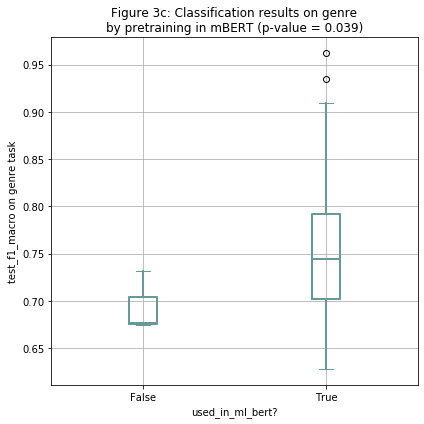

In [16]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="genre"],
"test_f1_macro", "used_in_ml_bert?",
title = "Figure 3c: Classification results on genre\nby pretraining in mBERT (p-value = 0.039)",
xlabel = "used_in_ml_bert?", ylabel = "test_f1_macro on genre task",
figure_name = "figure3c_classification_genre_in_BERT", figsize = (6,6),
)

### Division

In [17]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="division"], "used_in_ml_bert?", "test_f1_macro").round(3)

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,False,True,0.072,-2.181,0.63,0.698,0.612,0.715,


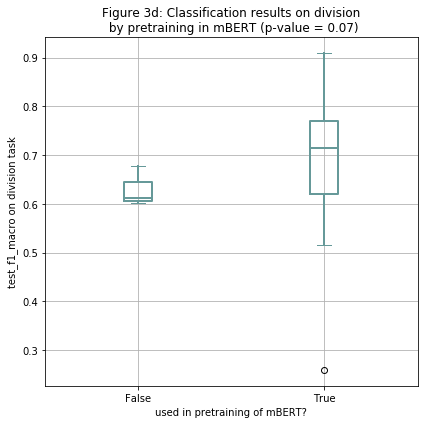

In [18]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="division"],
"test_f1_macro", "used_in_ml_bert?",
title = "Figure 3d: Classification results on division\n by pretraining in mBERT (p-value = 0.07)",
xlabel = "used in pretraining of mBERT?", ylabel = "test_f1_macro on division task",
figure_name = "figure3d_classification_division_in_BERT", figsize = (6,6), 
)

### Testament

In [19]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="testament"], "used_in_ml_bert?", "test_f1_macro").round(3)

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,False,True,0.041,-3.182,0.921,0.947,0.916,0.946,*


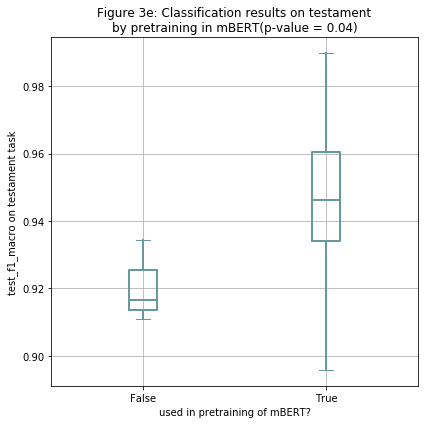

In [20]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="testament"],
"test_f1_macro", "used_in_ml_bert?",
title = "Figure 3e: Classification results on testament\nby pretraining in mBERT(p-value = 0.04)",
xlabel = "used in pretraining of mBERT?", ylabel = "test_f1_macro on testament task",
figure_name = "figure3e_classification_testament_in_BERT", figsize = (6,6), 
)

In [21]:
results_df

,eval/f1_macro,test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,in_Latin_script?
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,True,431808,False,False,True
bert-base-multilingual-cased_sequence_division_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.711125,0.712165,NaN,division,TUR,finished,-,versae,NaN,2021-11-08T10:41:48.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,True,431808,False,False,True
bert-base-multilingual-cased_sequence_testament_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.930773,0.934461,NaN,testament,TUR,finished,-,versae,NaN,2021-11-08T03:02:27.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,True,431808,False,False,True
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.576378,0.611678,NaN,division,XKL,finished,-,versae,NaN,2021-11-08T10:46:01.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bert-base-multilingual-cased_sequence_genre_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.630421,0.627669,NaN,genre,ARA,finished,-,versae,NaN,2021-11-08T03:26:36.000Z,...,Semitic,Semitic,Arabic alphabet,Q13955,Asia,True,1140422,False,False,False
bert-base-multilingual-cased_sequence_testament_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.892326,0.895786,NaN,testament,ARA,finished,-,versae,NaN,2021-11-07T23:45:52.000Z,...,Semitic,Semitic,Arabic alphabet,Q13955,Asia,True,1140422,False,False,False
bert-base-multilingual-cased_sequence_division_lALB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.713753,0.692851,NaN,division,ALB,finished,-,versae,NaN,2021-11-08T08:57:00.000Z,...,Indo-European,Albanian-Slavic-Romance-Germanic,Latin script,Q8748,Europe,True,84162,False,False,True


## Correlation with Wikipedia

In [22]:
results_df.loc[results_df["used_in_ml_bert?"]==False]

,eval/f1_macro,test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,in_Latin_script?
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.576378,0.611678,NaN,division,XKL,finished,-,versae,NaN,2021-11-08T10:46:01.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
bert-base-multilingual-cased_sequence_testament_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.910908,0.910910,NaN,testament,XKL,finished,-,versae,NaN,2021-11-08T03:06:08.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
bert-base-multilingual-cased_sequence_division_lHAT_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.618790,0.601796,NaN,division,HAT,finished,-,versae,NaN,2021-11-08T09:50:24.000Z,...,Romance,Albanian-Slavic-Romance-Germanic,Latin script,Q33491,America,False,63415,False,True,True
bert-base-multilingual-cased_sequence_genre_lHAT_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.670279,0.674015,NaN,genre,HAT,finished,-,versae,NaN,2021-11-08T05:06:05.000Z,...,Romance,Albanian-Slavic-Romance-Germanic,Latin script,Q33491,America,False,63415,False,True,True
bert-base-multilingual-cased_sequence_testament_lHAT_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.917800,0.916436,NaN,testament,HAT,finished,-,versae,NaN,2021-11-08T00:32:55.000Z,...,Romance,Albanian-Slavic-Romance-Germanic,Latin script,Q33491,America,False,63415,False,True,True
bert-base-multilingual-cased_sequence_division_lESP_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.714812,0.676868,NaN,division,ESP,finished,-,versae,NaN,2021-11-08T09:20:58.000Z,...,constructed language,constructed language,Latin script,Q143,artificial,False,305062,False,False,True
bert-base-multilingual-cased_sequence_genre_lESP_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.711708,0.731616,NaN,genre,ESP,finished,-,versae,NaN,2021-11-08T04:30:54.000Z,...,constructed language,constructed language,Latin script,Q143,artificial,False,305062,False,False,True
bert-base-multilingual-cased_sequence_testament_lESP_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.928867,0.934437,NaN,testament,ESP,finished,-,versae,NaN,2021-11-08T00:07:30.000Z,...,constructed language,constructed language,Latin script,Q143,artificial,False,305062,False,False,True


### Genre

In [23]:
r, p = stats.pearsonr(results_df.loc[results_df["dataset_config"]=="genre"]["test_f1_macro"], results_df.loc[results_df["dataset_config"]=="genre"]["wikipedia_nr_articles_2021"])
print(r, p)

0.6807464011071003 3.546293302264772e-06


c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


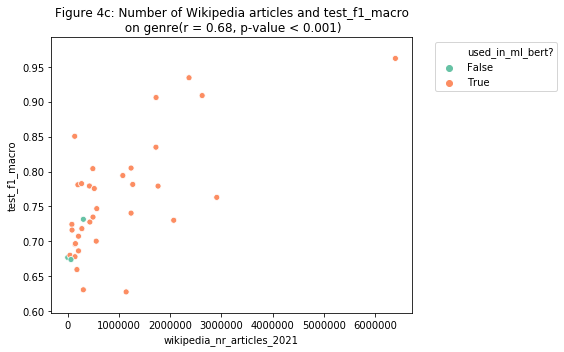

In [23]:
functions.plot_scatter_w_colors(results_df.loc[results_df["dataset_config"]=="genre"],
        column_x = "wikipedia_nr_articles_2021", column_y = "test_f1_macro", figsize= (8,5), palette = "Set2",
        column_color = "used_in_ml_bert?", title = "Figure 4c: Number of Wikipedia articles and test_f1_macro\n on genre(r = 0.68, p-value < 0.001)",
        outdir = "./../visualizations/", figure_name = "figure4c_wikipedia_classification_genre_in_BERT")

### Group of books

In [24]:
r, p = stats.pearsonr(results_df.loc[results_df["dataset_config"]=="division"]["test_f1_macro"], results_df.loc[results_df["dataset_config"]=="division"]["wikipedia_nr_articles_2021"])
print(r, p)

0.500573179366313 0.0016033220443489385


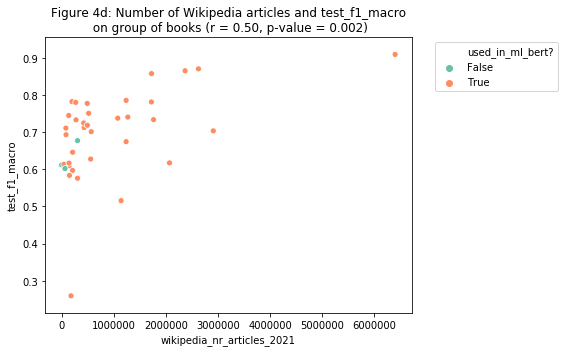

In [25]:
functions.plot_scatter_w_colors(results_df.loc[results_df["dataset_config"]=="division"],
        column_x = "wikipedia_nr_articles_2021", column_y = "test_f1_macro", figsize= (8,5),  palette = "Set2",
        column_color = "used_in_ml_bert?", title = "Figure 4d: Number of Wikipedia articles and test_f1_macro\n on group of books (r = 0.50, p-value = 0.002)",
        outdir = "./../visualizations/", figure_name = "figure4d_wikipedia_classification_division_in_BERT")

### Testament

In [26]:
r, p = stats.pearsonr(results_df.loc[results_df["dataset_config"]=="testament"]["test_f1_macro"], results_df.loc[results_df["dataset_config"]=="testament"]["wikipedia_nr_articles_2021"])
print(r, p)

0.5370169250459026 0.0006105016272380757


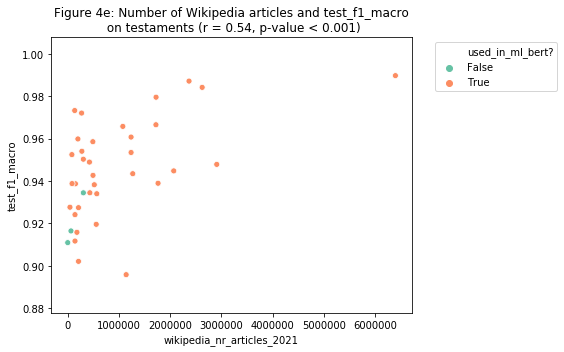

In [27]:
functions.plot_scatter_w_colors(results_df.loc[results_df["dataset_config"]=="testament"],
        column_x = "wikipedia_nr_articles_2021", column_y = "test_f1_macro", figsize= (8,5), palette = "Set2",
        column_color = "used_in_ml_bert?", title = "Figure 4e: Number of Wikipedia articles and test_f1_macro\n on testaments (r = 0.54, p-value < 0.001)",
        outdir = "./../visualizations/", figure_name = "figure4e_wikipedia_classification_testament_in_BERT")

In [28]:
results_df.loc[results_df["used_in_ml_bert?"] == False][["language","test_f1_macro"]].sort_values(by="test_f1_macro")

,language,test_f1_macro
Name,,
bert-base-multilingual-cased_sequence_division_lHAT_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Haitian Creole,0.601796
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Klingoln,0.611678
bert-base-multilingual-cased_sequence_genre_lHAT_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Haitian Creole,0.674015
bert-base-multilingual-cased_sequence_division_lESP_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Esperanto,0.676868
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Klingoln,0.676952
bert-base-multilingual-cased_sequence_genre_lESP_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Esperanto,0.731616
bert-base-multilingual-cased_sequence_testament_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Klingoln,0.910910
bert-base-multilingual-cased_sequence_testament_lHAT_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Haitian Creole,0.916436
bert-base-multilingual-cased_sequence_testament_lESP_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,Esperanto,0.934437


## Familiy of languages

In [61]:
results_df.columns.tolist()[-20:]

['test:test_label_lyric_support',
 'test:test_label_prophecy_f1-score',
 'test:test_label_prophecy_precision',
 'test:test_label_prophecy_recall',
 'test:test_label_prophecy_support',
 'test:test_label_wisdom_f1-score',
 'test:test_label_wisdom_precision',
 'test:test_label_wisdom_recall',
 'test:test_label_wisdom_support',
 'language',
 'family of languages',
 'macro family of languages',
 'main writing system',
 'q-values',
 'Continent',
 'used_in_ml_bert?',
 'wikipedia_nr_articles_2021',
 'is_English?',
 'is_Romance_or_Germanic?',
 'in_Latin_script?']

In [14]:
results_df.loc[results_df["dataset_config"] == "genre"].head()

,eval/f1_macro,test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,in_Latin_script?
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,True,431808,False,False,True
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,False,0,False,False,True
bert-base-multilingual-cased_sequence_genre_lVIE_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.759553,0.781546,NaN,genre,VIE,finished,-,versae,NaN,2021-11-08T08:41:30.000Z,...,Vietic,Vietic,Latin script,Q9199,Asia,True,1269473,False,False,True
bert-base-multilingual-cased_sequence_genre_lTHA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.676309,0.695811,NaN,genre,THA,finished,-,versae,NaN,2021-11-08T08:27:40.000Z,...,Tai,Tai,Thai alphabet,Q9217,Asia,True,141666,False,False,False
bert-base-multilingual-cased_sequence_genre_lTGL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.649947,0.680148,NaN,genre,TGL,finished,-,versae,NaN,2021-11-08T08:24:15.000Z,...,Austronesian,Austronesian,Latin script,Q34057,Asia,True,43343,False,False,True


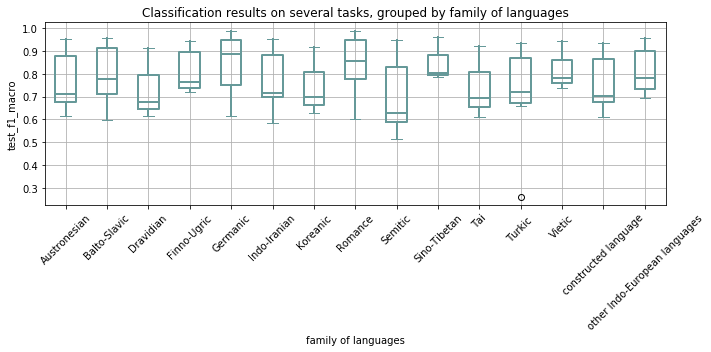

In [14]:
functions.plot_boxplots_by(results_df, "test_f1_macro", "family of languages",
rot = 45, xlabel = "family of languages", ylabel = "test_f1_macro",
title = "Classification results on several tasks, grouped by family of languages",
figure_name = "classification_family_languages",
figsize=(10,5))

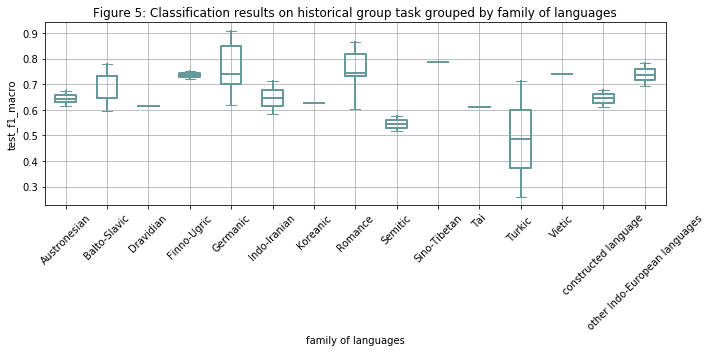

In [13]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"] == "division"], "test_f1_macro", "family of languages",
rot = 45, xlabel = "family of languages", ylabel = "test_f1_macro",
title = "Figure 5: Classification results on historical group task grouped by family of languages",
figure_name = "figure5_classification_family_languages",
figsize=(10,5))

### Genre

In [42]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="genre"], "is_Romance_or_Germanic?", "test_f1_macro").round(3)


,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,0.001,-3.86,0.719,0.821,**


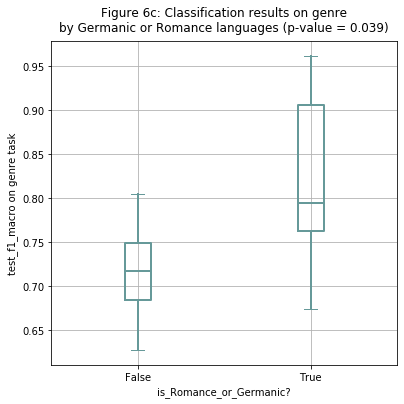

In [43]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="genre"],
"test_f1_macro", "is_Romance_or_Germanic?",
title = "Figure 6c: Classification results on genre\nby Germanic or Romance languages (p-value = 0.039)",
xlabel = "is_Romance_or_Germanic?", ylabel = "test_f1_macro on genre task",
figure_name = "figure6c_classification_genre_romance_germanic", figsize = (6,6),
)

### Group of texts

In [45]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="division"], "is_Romance_or_Germanic?", "test_f1_macro").round(3)


,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,0.006,-3.0,0.656,0.761,**


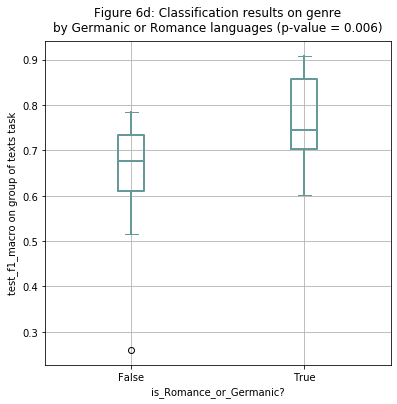

In [48]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="division"],
"test_f1_macro", "is_Romance_or_Germanic?",
title = "Figure 6d: Classification results on genre\nby Germanic or Romance languages (p-value = 0.006)",
xlabel = "is_Romance_or_Germanic?", ylabel = "test_f1_macro on group of texts task",
figure_name = "figure6d_classification_division_romance_germanic", figsize = (6,6),
)

### Testament

In [49]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="testament"], "is_Romance_or_Germanic?", "test_f1_macro").round(3)


,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,0.001,-3.802,0.935,0.962,**


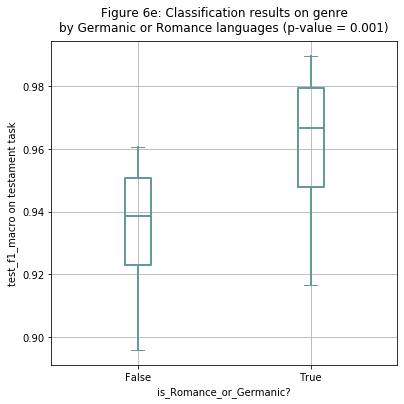

In [50]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="testament"],
"test_f1_macro", "is_Romance_or_Germanic?",
title = "Figure 6e: Classification results on genre\nby Germanic or Romance languages (p-value = 0.001)",
xlabel = "is_Romance_or_Germanic?", ylabel = "test_f1_macro on testament task",
figure_name = "figure6e_classification_testament_romance_germanic", figsize = (6,6),
)

## English

In [55]:
results_df["is_English?"].sum()

3

In [56]:
results_df["is_English?"]

Name
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0        False
bert-base-multilingual-cased_sequence_division_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0     False
bert-base-multilingual-cased_sequence_testament_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0    False
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0     False
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0        False
                                                                                            ...  
bert-base-multilingual-cased_sequence_genre_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0        False
bert-base-multilingual-cased_sequence_testament_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0    False
bert-base-multilingual-cased_sequence_division_lALB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0     False
bert-base-multilingual-cased_sequence_genre_lALB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0        False
bert-base-multi

## Scripts

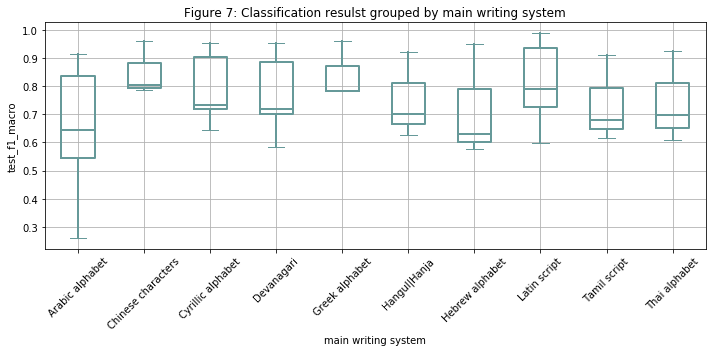

In [28]:
functions.plot_boxplots_by(results_df, "test_f1_macro", "main writing system",
rot = 45, xlabel = "main writing system", ylabel = "test_f1_macro",
title = "Figure 7: Classification resulst grouped by main writing system",
figure_name = "figure7_classification_scripts",
figsize=(10,5))

### Genre

In [29]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="genre"], "in_Latin_script?", "test_f1_macro").round(3)


,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,False,True,0.002,-3.303,0.706,0.781,0.697,0.769,**


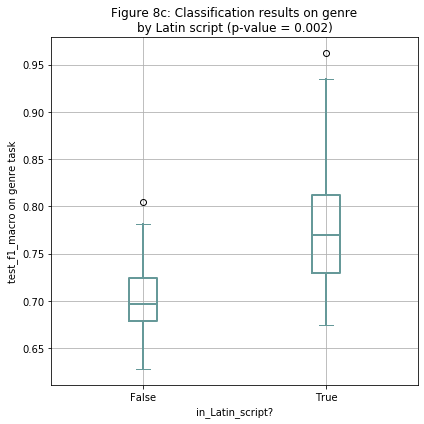

In [30]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="genre"],
"test_f1_macro", "in_Latin_script?",
title = "Figure 8c: Classification results on genre\nby Latin script (p-value = 0.002)",
xlabel = "in_Latin_script?", ylabel = "test_f1_macro on genre task",
figure_name = "figure8c_classification_genre_latin_script", figsize = (6,6),
)

### Group of Texts

In [67]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="division"], "in_Latin_script?", "test_f1_macro").round(3)


,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,0.033,-2.314,0.629,0.727,*


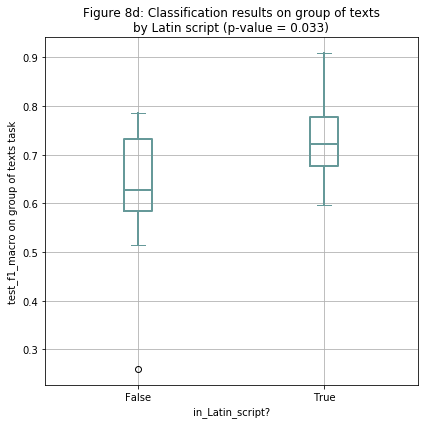

In [31]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="division"],
"test_f1_macro", "in_Latin_script?",
title = "Figure 8d: Classification results on group of texts\nby Latin script (p-value = 0.033)",
xlabel = "in_Latin_script?", ylabel = "test_f1_macro on group of texts task",
figure_name = "figure8d_classification_division_latin_script", figsize = (6,6),
)

### Testament

In [75]:
functions.test_differences_columns(results_df.loc[results_df["dataset_config"]=="testament"], "in_Latin_script?", "test_f1_macro").round(3)


,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,0.026,-2.367,0.933,0.951,*


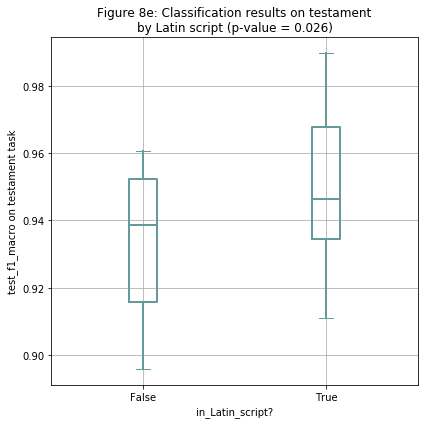

In [32]:
functions.plot_boxplots_by(results_df.loc[results_df["dataset_config"]=="testament"],
"test_f1_macro", "in_Latin_script?",
title = "Figure 8e: Classification results on testament\nby Latin script (p-value = 0.026)",
xlabel = "in_Latin_script?", ylabel = "test_f1_macro on testament task",
figure_name = "figure8e_classification_testament_latin_script", figsize = (6,6),
)

# Old Stuff

### English

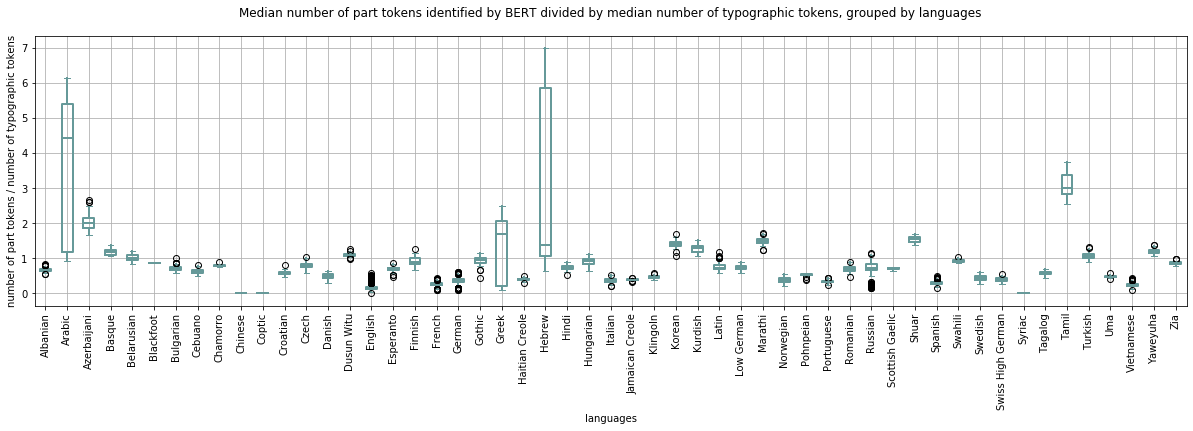

In [57]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<8], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "language", rot = 90, xlabel = "languages", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens, grouped by languages", figure_name = "part_tokens_typographic_tokens_languages")

In [58]:
results_languages_parts_df = functions.test_differences_columns(metadata, "language", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [59]:
results_english_parts_fewer_df = results_languages_parts_df.loc[((results_languages_parts_df["value1"] == "English") & (results_languages_parts_df["mean_value_1"] < results_languages_parts_df["mean_value_2"]) )
|
((results_languages_parts_df["value2"] == "English") & (results_languages_parts_df["mean_value_2"] < results_languages_parts_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [60]:
results_english_parts_fewer_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
715,English,Spanish,0.000000e+00,-72.102018,0.159967,0.290946,***
693,English,German,0.000000e+00,-77.830551,0.159967,0.359279,***
692,English,French,0.000000e+00,-49.627043,0.159967,0.253936,***
572,Czech,English,5.309654e-286,127.982484,0.790465,0.159967,***
705,English,Latin,1.195005e-279,-107.114621,0.159967,0.749780,***
700,English,Italian,1.329540e-230,-63.086403,0.159967,0.360482,***
14,Albanian,English,3.540960e-147,108.497533,0.664876,0.159967,***
712,English,Russian,4.497598e-146,-49.042789,0.159967,0.719086,***
357,Cebuano,English,2.040604e-123,81.282531,0.617788,0.159967,***
691,English,Finnish,1.620574e-121,-86.618540,0.159967,0.911762,***


In [61]:
results_english_parts_fewer_df.shape

(50, 7)

In [62]:
results_english_parts_more_df = results_languages_parts_df.loc[((results_languages_parts_df["value1"] == "English") & (results_languages_parts_df["mean_value_1"] >= results_languages_parts_df["mean_value_2"]) )
|
((results_languages_parts_df["value2"] == "English") & (results_languages_parts_df["mean_value_2"] >= results_languages_parts_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [63]:
results_english_parts_more_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
446,Chinese,English,0.0,-123.798373,0.000000,0.159967,***
489,Coptic,English,0.0,-123.798373,0.000000,0.159967,***
719,English,Syriac,0.0,123.798373,0.159967,0.000000,***


### Writing Systems

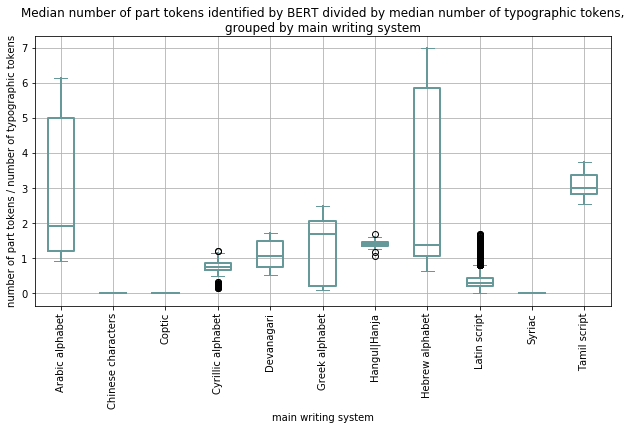

In [64]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]< 8], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "main writing system",
rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens",
title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system",
figure_name = "part_tokens_typographic_tokens_alphabet",
figsize=(10,5))

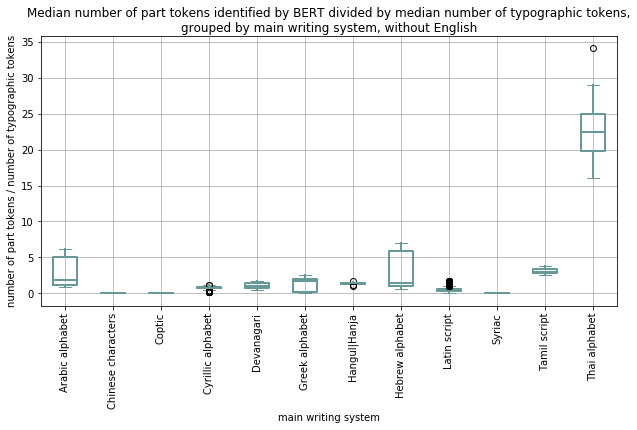

In [65]:
functions.plot_boxplots_by(metadata.loc[metadata["language"] != "English"], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "main writing system", rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system, without English", figure_name = "part_tokens_typographic_tokens_alphabet_wo_English",
figsize=(10,5))


In [66]:
results_writing_parts_df = functions.test_differences_columns(metadata, "main writing system", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [67]:
results_writing_parts_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,Arabic alphabet,Chinese characters,3.208784e-58,22.141933,2.681856,0.000000,***
1,Arabic alphabet,Coptic,3.208784e-58,22.141933,2.681856,0.000000,***
2,Arabic alphabet,Cyrillic alphabet,2.200079e-38,15.807328,2.681856,0.761807,***
3,Arabic alphabet,Devanagari,3.923702e-28,12.445962,2.681856,1.116810,***
4,Arabic alphabet,Greek alphabet,1.286059e-23,11.040819,2.681856,1.279284,***
...,...,...,...,...,...,...,...
61,Latin script,Tamil script,2.394257e-62,-67.633526,0.373185,3.070656,***
62,Latin script,Thai alphabet,3.715469e-54,-51.010313,0.373185,22.488546,***
63,Syriac,Tamil script,1.221794e-65,-77.146269,0.000000,3.070656,***
64,Syriac,Thai alphabet,1.291157e-54,-51.871971,0.000000,22.488546,***


In [68]:
results_writing_parts_df.loc[(results_writing_parts_df["value1"] == "Latin script") | (results_writing_parts_df["value2"] == "Latin script") ].sort_values(by="pvalue")

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
17,Chinese characters,Latin script,0.000000e+00,-147.253510,0.000000,0.373185,***
26,Coptic,Latin script,0.000000e+00,-147.253510,0.000000,0.373185,***
60,Latin script,Syriac,0.000000e+00,147.253510,0.373185,0.000000,***
34,Cyrillic alphabet,Latin script,8.377691e-166,40.960830,0.761807,0.373185,***
47,Greek alphabet,Latin script,1.648745e-84,23.600687,1.279284,0.373185,***
52,Hangul|Hanja,Latin script,1.653226e-69,77.546510,1.417316,0.373185,***
61,Latin script,Tamil script,2.394257e-62,-67.633526,0.373185,3.070656,***
62,Latin script,Thai alphabet,3.715469e-54,-51.010313,0.373185,22.488546,***
56,Hebrew alphabet,Latin script,1.987570e-51,19.100375,3.258496,0.373185,***
7,Arabic alphabet,Latin script,1.041637e-48,19.056673,2.681856,0.373185,***


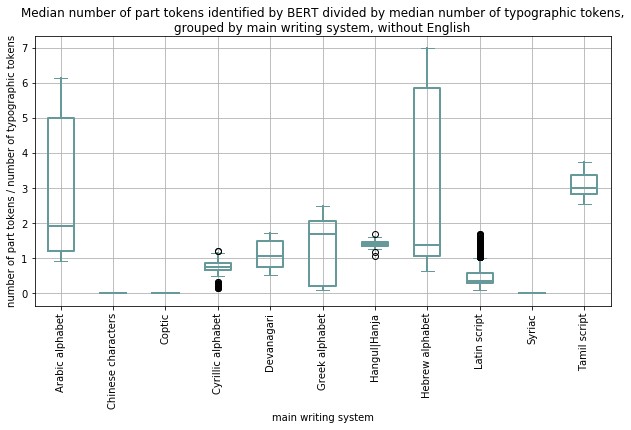

In [69]:
functions.plot_boxplots_by(metadata.loc[(metadata["language"] != "English") & (metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 8) ], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "main writing system", rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system, without English", figure_name = "part_tokens_typographic_tokens_alphabet_wo_English",
figsize=(10,5))


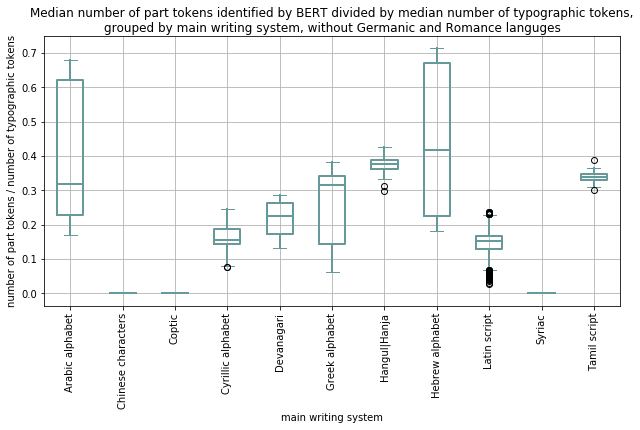

In [70]:
functions.plot_boxplots_by(metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"])) & (metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 8)], "bert_multilingual_cased_count_parts_tokens_median/characters_count_median", "main writing system", rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system, without Germanic and Romance languges", figure_name = "part_tokens_typographic_tokens_alphabet_wo_germanic_romance",
figsize=(10,5))


In [71]:
metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"]) ) & (metadata["main writing system"].isin(["Cyrillic alphabet","Latin script"]) )]

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period,in_Latin_script?,characters_count_mean/text_count_tokens_mean
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,4.516399
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,4.467251
5,235,./../data/bibles/transformed_xml_with_year\SF_...,BEL,Belarusian Bible,0,31169,1190,66,zefania,SF_2021-01-31_BEL_BELA_(Belarusian Bible),...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,4.613028
6,151,./../data/bibles/transformed_xml_with_year\SF_...,BUL,Veren's Contemporary Bible,0,31101,1189,66,zefania,SF_2010-01-10_BUL_BULVEREN_(VEREN'S CONTEMPORA...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,4.421682
7,10,./../data/bibles/transformed_xml_with_year\SF_...,CEB,Cebuano Ang Biblia (Bugna Version),0,31102,1189,66,zefania,SF_2009-01-20_CEB_CEB-B_(CEBUANO ANG BIBLIA (B...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,4.795391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,3.897486
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,5.821854
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,2.893244
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,5.843772


In [72]:
metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"]) ) & (metadata["main writing system"].isin(["Latin script"]) )]["language"].value_counts()

Czech              291
Cebuano            132
Finnish            132
Vietnamese         132
Albanian           132
Hungarian          132
Klingoln            66
Esperanto           66
Tagalog             66
Croatian            66
Turkish             65
Pohnpeian           28
Uma                 27
Shuar               27
Zia                 27
Dusun Witu          27
Yaweyuha            27
Basque              27
Swahili             26
Scottish Gaelic      6
Chamorro             6
Blackfoot            1
Name: language, dtype: int64

In [73]:
results_writing_cyrilic_latin_wo_germanic_romance_parts_df = functions.test_differences_columns(metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"]) ) & (metadata["main writing system"].isin(["Cyrillic alphabet","Latin script"]) )], "main writing system", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


In [74]:
results_writing_cyrilic_latin_wo_germanic_romance_parts_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,Cyrillic alphabet,Latin script,0.033796,2.125432,0.761807,0.737643,*


### Part of Training Material in BERT

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


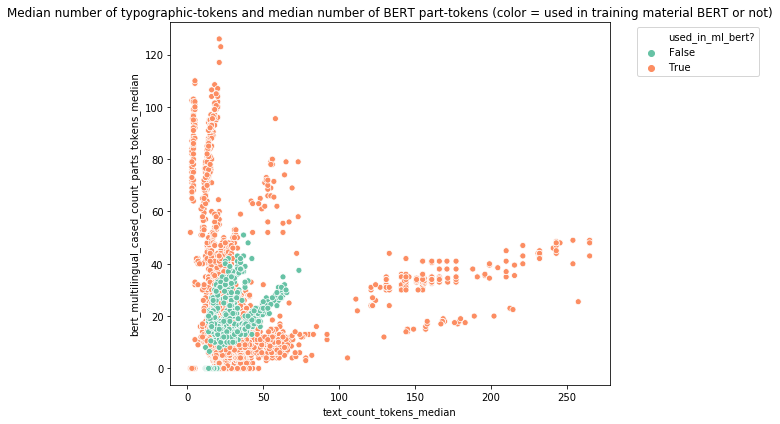

In [75]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["text_count_tokens_median"] < 300)].sort_values(by="used_in_ml_bert?", ascending=False),
        column_x = "text_count_tokens_median", column_y = "bert_multilingual_cased_count_parts_tokens_median", palette= "Set2",
        column_color = "used_in_ml_bert?", title = "Median number of typographic-tokens and median number of BERT part-tokens (color = used in training material BERT or not)", outdir = "./../visualizations/", figure_name = "median_tokens_part_tokens_training")

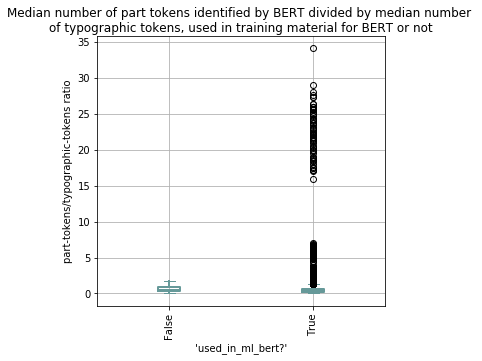

In [76]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "used_in_ml_bert?", rot = 90,
xlabel = "'used_in_ml_bert?'", ylabel = "part-tokens/typographic-tokens ratio",
title = "Median number of part tokens identified by BERT divided by median number \nof typographic tokens, used in training material for BERT or not",
figure_name = "part_tokens_bert", figsize = (5,5))


In [77]:
results_in_bert_parts_df = functions.test_differences_columns(metadata, "used_in_ml_bert?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


In [78]:
results_in_bert_parts_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,0.194699,-1.297237,0.662981,0.696531,


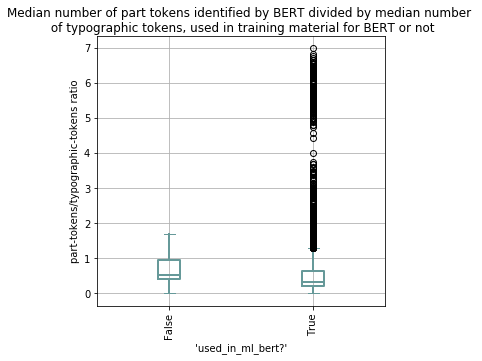

In [79]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 8], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "used_in_ml_bert?", rot = 90,
xlabel = "'used_in_ml_bert?'", ylabel = "part-tokens/typographic-tokens ratio",
title = "Median number of part tokens identified by BERT divided by median number \n of typographic tokens, used in training material for BERT or not",
figure_name = "part_tokens_bert_2", figsize = (5,5))


In [80]:
functions.test_differences_columns(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 8], "used_in_ml_bert?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,4.462807e-07,5.094952,0.662981,0.562226,***


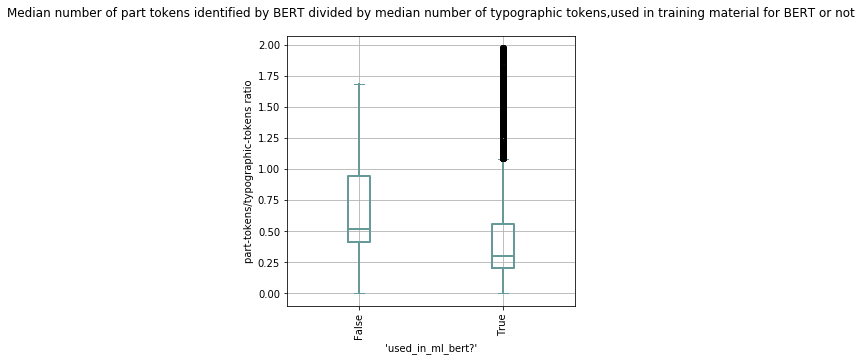

In [83]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 2], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "used_in_ml_bert?", rot = 90,
xlabel = "'used_in_ml_bert?'", ylabel = "part-tokens/typographic-tokens ratio",
title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,used in training material for BERT or not",
figure_name = "part_tokens_bert_2", figsize = (5,5))


In [84]:
functions.test_differences_columns(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 2], "used_in_ml_bert?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,3.344415e-34,13.089851,0.662981,0.422046,***


### Correlation with Wikipedia's Size

In [85]:
languages_mean_df.head()

,language,macro family of languages,main writing system,index,year,number_verses_translation,number_chapters_translation,number_books_translation,text_count_tokens_mean,text_count_tokens_median,...,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,in_Latin_script?
0,Albanian,Albanian-Slavic-Romance-Germanic,Latin script,119.500000,0.000000,31102.000000,1189.000000,66.000000,28.675941,27.553030,...,1.678507,0.664223,0.009851,True,84162.0,False,False,0.144235,0.664876,True
2,Arabic,Semitic,Arabic alphabet,85.083969,0.000000,31101.496183,1189.000000,66.000000,16.457412,15.812977,...,4.326791,3.283510,0.000000,True,1140422.0,False,False,0.437399,3.294676,False
4,Azerbaijani,Turkic,Arabic alphabet,162.000000,0.000000,31102.000000,1189.000000,66.000000,18.533909,17.810606,...,3.192559,2.057189,0.000061,True,179494.0,False,False,0.326724,2.042516,False
5,Belarusian,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,235.000000,0.000000,31169.000000,1190.000000,66.000000,23.020679,22.121212,...,2.009111,1.023780,0.006454,True,209937.0,False,False,0.212890,1.020240,False
6,Bulgarian,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,147.806452,555.677419,24381.774194,919.290323,54.677419,24.135792,23.268817,...,1.717894,0.719718,0.004006,True,275867.0,False,False,0.152732,0.714378,False


c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


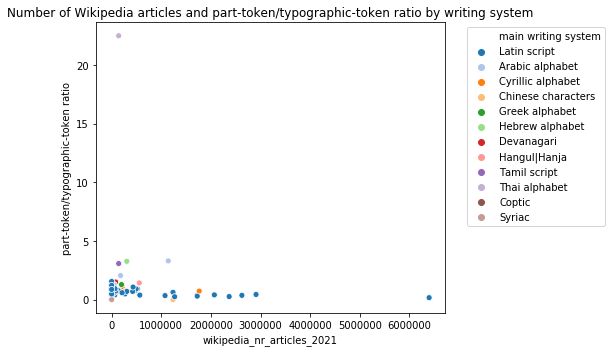

In [86]:
functions.plot_scatter_w_colors(languages_mean_df,
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", figsize= (8,5), ylabel= "part-token/typographic-token ratio",
        column_color = "main writing system", title = "Number of Wikipedia articles and part-token/typographic-token ratio by writing system", outdir = "./../visualizations/", figure_name = "wikipedia_ratio_writing_system")

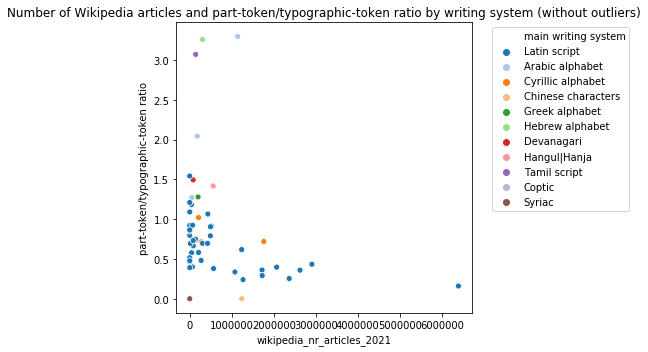

In [87]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", figsize= (8,5), ylabel= "part-token/typographic-token ratio",
        column_color = "main writing system", title = "Number of Wikipedia articles and part-token/typographic-token ratio by writing system (without outliers)", outdir = "./../visualizations/", figure_name = "wikipedia_ratio_writing_system_wo_outliers")

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


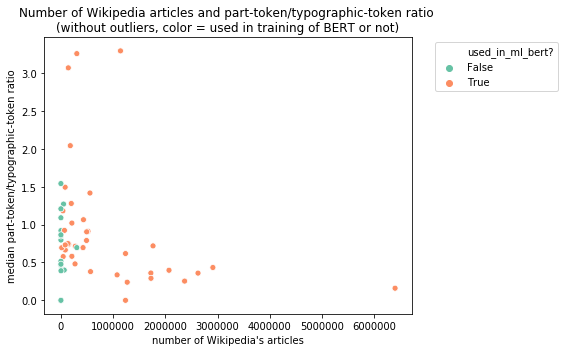

In [181]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", figsize= (8,5), ylabel= "median part-token/typographic-token ratio", xlabel = "number of Wikipedia's articles", palette = "Set2",
        column_color = "used_in_ml_bert?", title = "Number of Wikipedia articles and part-token/typographic-token ratio \n(without outliers, color = used in training of BERT or not)", outdir = "./../visualizations/", figure_name = "wikipedia_ratio_training_wo_outliers")

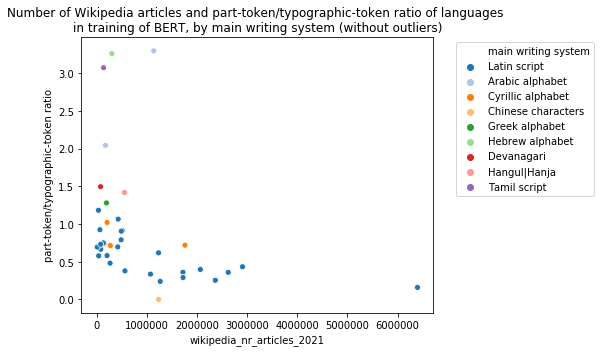

In [91]:
functions.plot_scatter_w_colors(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5) & ( languages_mean_df["used_in_ml_bert?"] == 1 )],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", figsize= (8,5), ylabel= "part-token/typographic-token ratio",
        column_color = "main writing system", title = "Number of Wikipedia articles and part-token/typographic-token ratio of languages \nin training of BERT, by main writing system (without outliers)", outdir = "./../visualizations/", figure_name = "wikipedia_ratio_training_only_training_bert_wo_outliers")

In [92]:
r, p = stats.pearsonr(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5]["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"], languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5]["wikipedia_nr_articles_2021"])
print(r, p)

-0.24772742852551155 0.07370015805635263


In [93]:
r, p = stats.pearsonr(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"], languages_mean_df["wikipedia_nr_articles_2021"])
print(r, p)

-0.11810671929697292 0.39500363411318845


In [94]:
languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5) & ( languages_mean_df["used_in_ml_bert?"] == 1 )].shape

(37, 60)

In [95]:
r, p = stats.pearsonr(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5) & ( languages_mean_df["used_in_ml_bert?"] == 1 )]["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"], languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5) & ( languages_mean_df["used_in_ml_bert?"] == 1 )]["wikipedia_nr_articles_2021"])
print(r, p)


-0.3396104302242528 0.0397406317251419


## Older Things

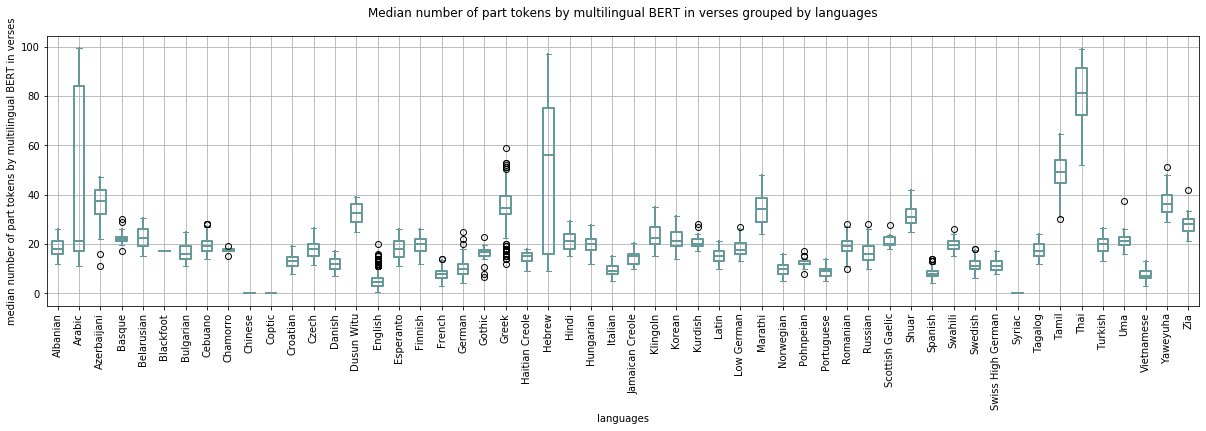

In [96]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median"]<100], "bert_multilingual_cased_count_parts_tokens_median", "language", rot = 90, xlabel = "languages", ylabel = "median number of part tokens by multilingual BERT in verses", title = "Median number of part tokens by multilingual BERT in verses grouped by languages", figure_name = "languages_multilingual_bert_median_part_tokens")

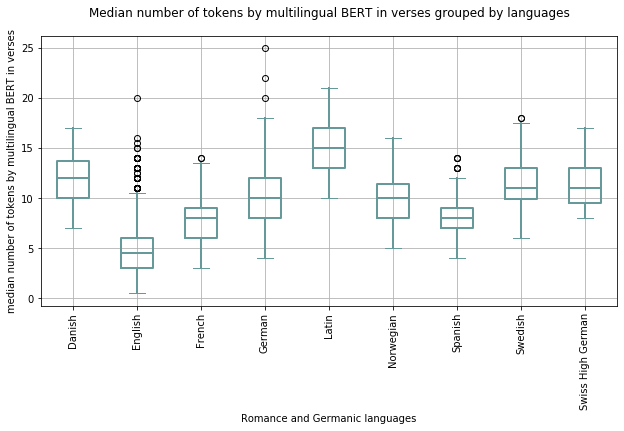

In [97]:
functions.plot_boxplots_by(metadata.loc[(metadata["language_code"].isin(["GER", "ENG", "NL_", "NOR", "DAN", "SWE", "FRE", "LAT", "SPA"])) & (metadata["bert_multilingual_cased_count_parts_tokens_median"] < 100)], "bert_multilingual_cased_count_parts_tokens_median", "language", rot = 90, xlabel = "Romance and Germanic languages", ylabel = "median number of tokens by multilingual BERT in verses", title = "Median number of tokens by multilingual BERT in verses grouped by languages", figure_name = "languages_multilingual_bert_parts_median_germanic_romance", figsize=(10,5))


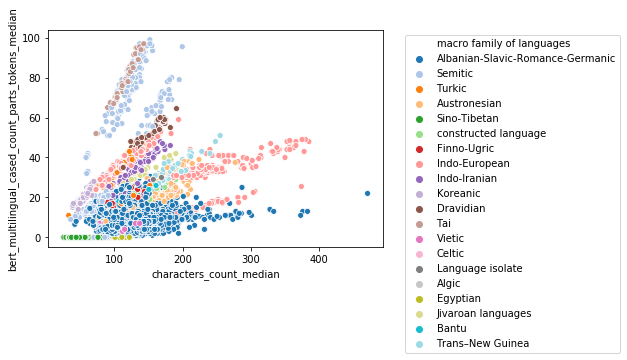

In [98]:
sns.scatterplot(x ="characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "macro family of languages", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_mean"] < 100) ],
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


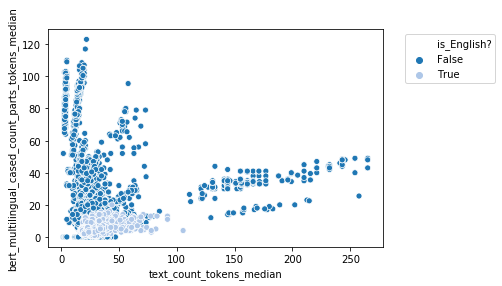

In [99]:
sns.scatterplot(x ="text_count_tokens_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "is_English?", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_median"] < 125) ].sort_values(by="is_English?"),
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


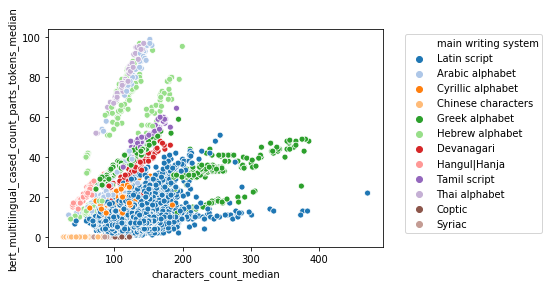

In [100]:
sns.scatterplot(x ="characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "main writing system", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_mean"] < 100) ],
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


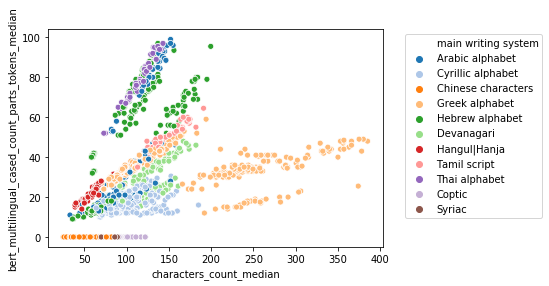

In [101]:



sns.scatterplot(x ="characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "main writing system", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_mean"] < 100) & (metadata["main writing system"] != "Latin script")],
#
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')




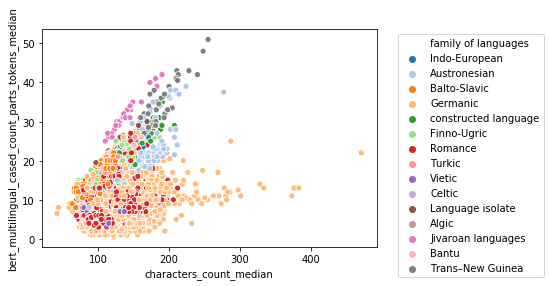

In [102]:
sns.scatterplot(x ="characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "family of languages", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_mean"] < 100) & (metadata["main writing system"] == "Latin script")],
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


### Calculate regression line

In [103]:
from scipy import stats

results_regression_language_name = []

for language in metadata["language"].unique().tolist():
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(
        metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_median"] < 100) & (metadata["language"] == language)]["characters_count_median"],
        metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_median"] < 100) & (metadata["language"] == language)]["bert_multilingual_cased_count_parts_tokens_median"],
        )
    results_regression_language_name.append([language, slope, intercept, rvalue, pvalue, stderr] )


C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid valu

In [104]:
results_regression_language_name_df = pd.DataFrame(results_regression_language_name, columns = ["language", "slope", "intercept", "rvalue", "pvalue", "stderr"])

In [105]:
results_regression_language_name_df

,language,slope,intercept,rvalue,pvalue,stderr
0,Albanian,0.136166,0.992242,0.947686,2.489268e-66,0.004023
1,Arabic,1.026274,-55.848434,0.957259,1.033218e-62,0.029170
2,Azerbaijani,0.327435,-0.078680,0.969312,1.026314e-40,0.010380
3,Belarusian,0.197737,1.545566,0.961184,1.669820e-37,0.007095
4,Bulgarian,0.158983,-0.680331,0.898374,2.830116e-34,0.008148
5,Cebuano,0.104345,2.696504,0.900144,9.322358e-49,0.004429
6,Chinese,0.000000,0.000000,0.000000,1.000000e+00,0.000000
7,Czech,0.161433,0.489613,0.919559,2.960398e-119,0.004058
8,Danish,0.097787,0.722900,0.770243,3.507431e-26,0.007242
9,English,0.043818,-0.995332,0.604182,2.337988e-234,0.001191


In [106]:
results_regression_language_name_df.index = results_regression_language_name_df.language

In [107]:
colors = functions.get_colors_lt(cmap_name = "tab20")

In [108]:
metadata, color_dict = functions.add_color_column_based_on_str_column(metadata, colors = colors, column_name = "main writing system")

In [109]:
metadata[["language", "main writing system", "main writing system_colors"]]

,language,main writing system,main writing system_colors
0,Albanian,Latin script,#1f77b4
1,Albanian,Latin script,#1f77b4
2,Arabic,Arabic alphabet,#aec7e8
3,Arabic,Arabic alphabet,#aec7e8
4,Azerbaijani,Arabic alphabet,#aec7e8
...,...,...,...
11276,Vietnamese,Latin script,#1f77b4
11277,Dusun Witu,Latin script,#1f77b4
11278,Klingoln,Latin script,#1f77b4
11279,Yaweyuha,Latin script,#1f77b4


In [110]:
results_regression_language_name_df.drop(columns="language", inplace=True)

In [111]:
results_regression_language_name_df = pd.merge(results_regression_language_name_df, metadata[["language", "main writing system", "main writing system_colors"]], left_on= "language", right_on="language", how='inner')

In [112]:
results_regression_language_name_df

,language,slope,intercept,rvalue,pvalue,stderr,main writing system,main writing system_colors
0,Albanian,0.136166,0.992242,0.947686,2.489268e-66,0.004023,Latin script,#1f77b4
1,Albanian,0.136166,0.992242,0.947686,2.489268e-66,0.004023,Latin script,#1f77b4
2,Albanian,0.136166,0.992242,0.947686,2.489268e-66,0.004023,Latin script,#1f77b4
3,Albanian,0.136166,0.992242,0.947686,2.489268e-66,0.004023,Latin script,#1f77b4
4,Albanian,0.136166,0.992242,0.947686,2.489268e-66,0.004023,Latin script,#1f77b4
...,...,...,...,...,...,...,...,...
11276,Zia,0.177324,-2.041445,0.984160,2.641490e-20,0.006389,Latin script,#1f77b4
11277,Zia,0.177324,-2.041445,0.984160,2.641490e-20,0.006389,Latin script,#1f77b4
11278,Zia,0.177324,-2.041445,0.984160,2.641490e-20,0.006389,Latin script,#1f77b4
11279,Zia,0.177324,-2.041445,0.984160,2.641490e-20,0.006389,Latin script,#1f77b4


In [113]:
results_regression_language_name_df = results_regression_language_name_df.groupby("language").head(1)

In [114]:
results_regression_language_name_df.index = results_regression_language_name_df["language"]

In [115]:
results_regression_language_name_df

,language,slope,intercept,rvalue,pvalue,stderr,main writing system,main writing system_colors
language,,,,,,,,
Albanian,Albanian,0.136166,0.992242,0.947686,2.489268e-66,0.004023,Latin script,#1f77b4
Arabic,Arabic,1.026274,-55.848434,0.957259,1.033218e-62,0.029170,Arabic alphabet,#aec7e8
Azerbaijani,Azerbaijani,0.327435,-0.078680,0.969312,1.026314e-40,0.010380,Arabic alphabet,#aec7e8
Belarusian,Belarusian,0.197737,1.545566,0.961184,1.669820e-37,0.007095,Cyrillic alphabet,#ff7f0e
Bulgarian,Bulgarian,0.158983,-0.680331,0.898374,2.830116e-34,0.008148,Cyrillic alphabet,#ff7f0e
Cebuano,Cebuano,0.104345,2.696504,0.900144,9.322358e-49,0.004429,Latin script,#1f77b4
Chinese,Chinese,0.000000,0.000000,0.000000,1.000000e+00,0.000000,Chinese characters,#ffbb78
Czech,Czech,0.161433,0.489613,0.919559,2.960398e-119,0.004058,Latin script,#1f77b4
Danish,Danish,0.097787,0.722900,0.770243,3.507431e-26,0.007242,Latin script,#1f77b4


In [116]:
results_regression_language_name_df = results_regression_language_name_df.sort_values(by="slope")

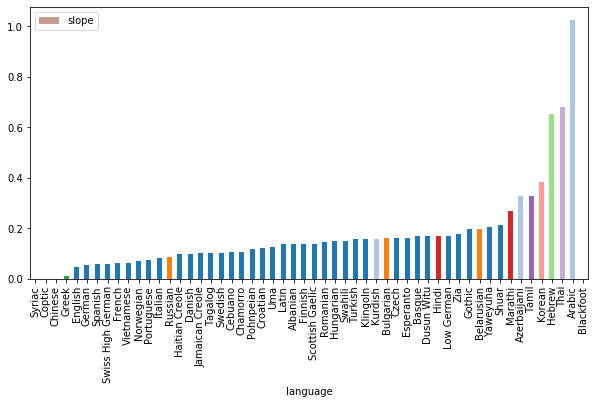

In [117]:
results_regression_language_name_df.plot.bar(y = "slope", figsize= (10,5), color = results_regression_language_name_df["main writing system_colors"])

## Unknown Tokens

### Indo-European Languages

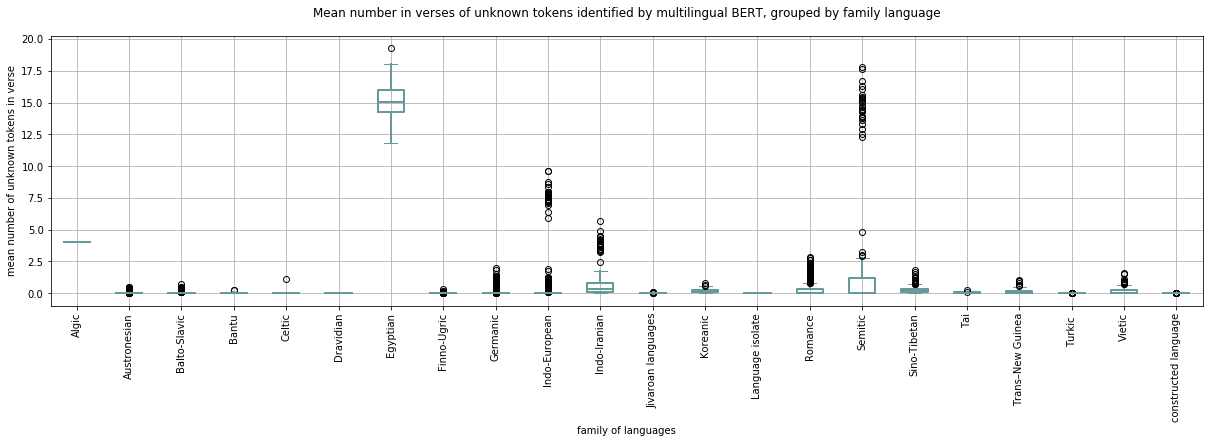

In [118]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "family of languages", rot = 90, xlabel = "family of languages", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified by multilingual BERT, grouped by family language", figure_name = "unknown_tokens_languages")

In [119]:
metadata.groupby("family of languages")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()

family of languages
Language isolate         0.000000
Dravidian                0.000000
constructed language     0.000636
Turkic                   0.000706
Finno-Ugric              0.010357
Jivaroan languages       0.012769
Austronesian             0.027564
Balto-Slavic             0.040474
Bantu                    0.043971
Tai                      0.046730
Germanic                 0.059237
Trans–New Guinea         0.161269
Celtic                   0.181030
Vietic                   0.196425
Koreanic                 0.236849
Sino-Tibetan             0.275564
Romance                  0.290781
Indo-European            0.378315
Indo-Iranian             0.956997
Semitic                  1.424440
Algic                    4.026585
Egyptian                15.196794
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [120]:
metadata.groupby("is_Romance_or_Germanic?")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()

is_Romance_or_Germanic?
True     0.163863
False    0.440447
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [121]:
results_romance_germanic_unks_df = functions.test_differences_columns(metadata, "is_Romance_or_Germanic?", "bert_multilingual_cased_count_unks_mean")

In [122]:
results_romance_germanic_unks_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,3.844223e-16,8.180789,0.440447,0.163863,***


### English

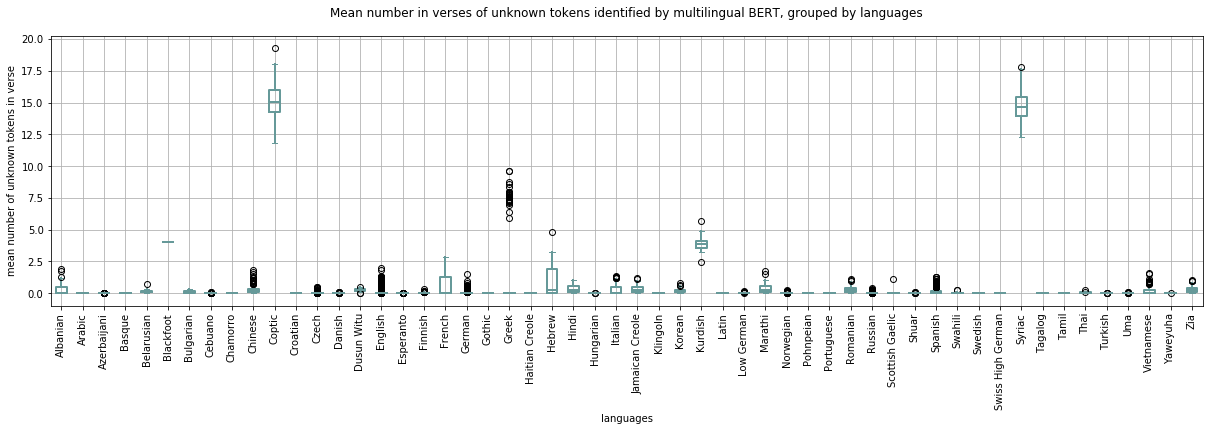

In [123]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "language", rot = 90, xlabel = "languages", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified by multilingual BERT, grouped by languages", figure_name = "unknown_tokens_languages")

In [124]:
metadata.groupby("language")["bert_multilingual_cased_count_unks_mean"].mean().sort_values(ascending=True).head(20)

language
Gothic               0.000000
Tagalog              0.000000
Swiss High German    0.000000
Croatian             0.000000
Tamil                0.000000
Klingoln             0.000000
Chamorro             0.000000
Haitian Creole       0.000000
Swedish              0.000000
Latin                0.000000
Portuguese           0.000000
Basque               0.000000
Arabic               0.000000
Hungarian            0.000038
Yaweyuha             0.000041
Turkish              0.000198
Azerbaijani          0.001207
Esperanto            0.001271
Cebuano              0.003353
Danish               0.011211
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [125]:
metadata.groupby("language")["bert_multilingual_cased_count_unks_mean"].mean().sort_values(ascending=True).index.tolist().index("English")

31

In [126]:
metadata.groupby("language")["bert_multilingual_cased_count_unks_mean"].mean().sort_values(ascending=False)

language
Coptic               15.196794
Syriac               14.781034
Blackfoot             4.026585
Kurdish               3.887323
Hebrew                0.757673
French                0.610106
Greek                 0.399758
Marathi               0.381349
Jamaican Creole       0.379659
Hindi                 0.333875
Zia                   0.322497
Romanian              0.312654
Albanian              0.293519
Chinese               0.275564
Dusun Witu            0.243753
Korean                0.236849
Italian               0.236327
Vietnamese            0.196425
Scottish Gaelic       0.181030
Belarusian            0.147802
Spanish               0.132011
Bulgarian             0.099340
English               0.079559
Thai                  0.046730
Swahili               0.043971
German                0.036856
Russian               0.026316
Czech                 0.020900
Finnish               0.020675
Norwegian             0.019751
Pohnpeian             0.018477
Low German            0.016235

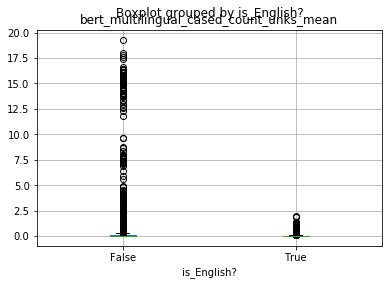

In [127]:
metadata.boxplot("bert_multilingual_cased_count_unks_mean", by = "is_English?")

In [128]:
results_english_unks_df = functions.test_differences_columns(metadata, "is_English?", "bert_multilingual_cased_count_unks_mean")

In [129]:
metadata.groupby("is_English?")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()

is_English?
True     0.079559
False    0.296200
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [130]:
results_languages_unks_df = functions.test_differences_columns(metadata, "language", "bert_multilingual_cased_count_unks_mean")

C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [131]:
results_english_unks_fewer_df = results_languages_unks_df.loc[((results_languages_unks_df["value1"] == "English") & (results_languages_unks_df["mean_value_1"] < results_languages_unks_df["mean_value_2"]) )
|
((results_languages_unks_df["value2"] == "English") & (results_languages_unks_df["mean_value_2"] < results_languages_unks_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [132]:
results_english_unks_fewer_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
692,English,French,1.528894e-107,-24.292926,0.079559,0.610106,***
719,English,Syriac,1.203344e-28,-55.973757,0.079559,14.781034,***
489,Coptic,English,2.075968e-27,50.132584,15.196794,0.079559,***
704,English,Kurdish,3.767918e-23,-34.061016,0.079559,3.887323,***
697,English,Hebrew,9.398543e-23,-10.804342,0.079559,0.757673,***
711,English,Romanian,1.293025e-19,-10.568222,0.079559,0.312654,***
446,Chinese,English,6.374755e-15,8.402688,0.275564,0.079559,***
700,English,Italian,9.787210e-15,-8.079278,0.079559,0.236327,***
715,English,Spanish,1.222365e-13,-7.450893,0.079559,0.132011,***
703,English,Korean,1.889345e-11,-7.955380,0.079559,0.236849,***


In [133]:
results_english_unks_fewer_df.shape

(22, 7)

In [134]:
results_english_unks_more_df = results_languages_unks_df.loc[((results_languages_unks_df["value1"] == "English") & (results_languages_unks_df["mean_value_1"] >= results_languages_unks_df["mean_value_2"]) )
|
((results_languages_unks_df["value2"] == "English") & (results_languages_unks_df["mean_value_2"] >= results_languages_unks_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [135]:
results_english_unks_more_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
66,Arabic,English,8.959060e-70,-18.260348,0.000000,0.079559,***
721,English,Tamil,8.959060e-70,18.260348,0.079559,0.000000,***
720,English,Tagalog,8.959060e-70,18.260348,0.079559,0.000000,***
718,English,Swiss High German,8.959060e-70,18.260348,0.079559,0.000000,***
717,English,Swedish,8.959060e-70,18.260348,0.079559,0.000000,***
710,English,Portuguese,8.959060e-70,18.260348,0.079559,0.000000,***
702,English,Klingoln,8.959060e-70,18.260348,0.079559,0.000000,***
696,English,Haitian Creole,8.959060e-70,18.260348,0.079559,0.000000,***
694,English,Gothic,8.959060e-70,18.260348,0.079559,0.000000,***
705,English,Latin,8.959060e-70,18.260348,0.079559,0.000000,***


In [136]:
results_english_unks_more_df.shape

(31, 7)

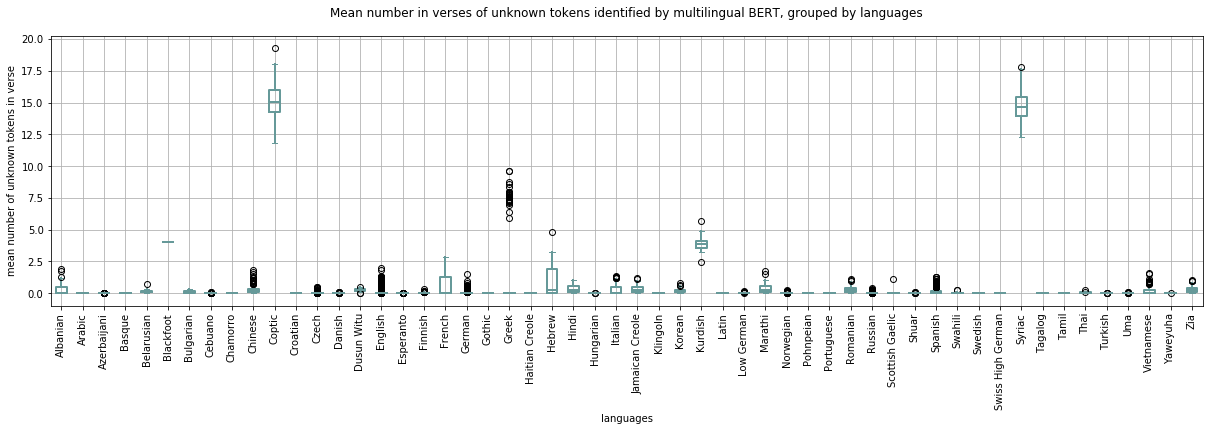

In [137]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "language", rot = 90, xlabel = "languages", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified by multilingual BERT, grouped by languages", figure_name = "unknown_tokens_languages")

### Writing System

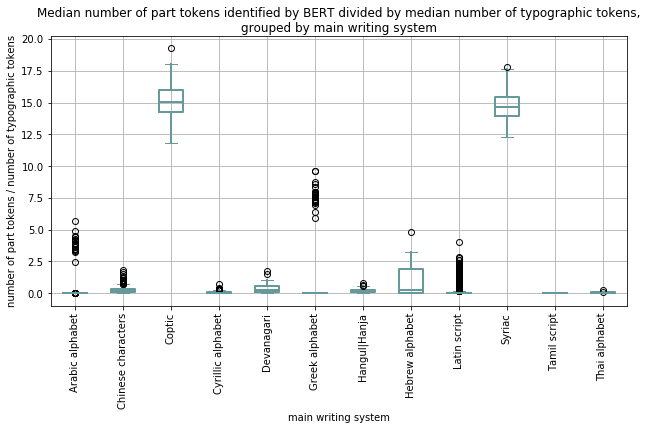

In [138]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "main writing system",
rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens",
title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system",
figure_name = "part_tokens_typographic_tokens_alphabet",
figsize=(10,5))

In [139]:
results_writing_unks_df = functions.test_differences_columns(metadata, "main writing system", "bert_multilingual_cased_count_unks_mean")

In [140]:
results_writing_unks_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,Arabic alphabet,Chinese characters,3.033878e-02,2.177809,0.468917,0.275564,*
1,Arabic alphabet,Coptic,6.526360e-30,-46.982338,0.468917,15.196794,***
2,Arabic alphabet,Cyrillic alphabet,3.251552e-06,4.774550,0.468917,0.058864,***
3,Arabic alphabet,Devanagari,2.206197e-01,1.227704,0.468917,0.357612,
4,Arabic alphabet,Greek alphabet,5.450411e-01,0.605578,0.468917,0.399758,
...,...,...,...,...,...,...,...
61,Latin script,Tamil script,8.565068e-300,38.424236,0.147571,0.000000,***
62,Latin script,Thai alphabet,4.899533e-33,15.469632,0.147571,0.046730,***
63,Syriac,Tamil script,1.072360e-28,56.284413,14.781034,0.000000,***
64,Syriac,Thai alphabet,1.123515e-28,56.095191,14.781034,0.046730,***


In [141]:
positive_results_writing_unks_df = results_writing_unks_df.loc[((results_writing_unks_df["value1"] == "Latin script") & (results_writing_unks_df["mean_value_1"] < results_writing_unks_df["mean_value_2"]) )
|
((results_writing_unks_df["value2"] == "Latin script") & (results_writing_unks_df["mean_value_2"] < results_writing_unks_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [142]:
positive_results_writing_unks_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
60,Latin script,Syriac,1.363560e-28,-55.716523,0.147571,14.781034,***
26,Coptic,Latin script,2.340425e-27,49.908203,15.196794,0.147571,***
56,Hebrew alphabet,Latin script,2.748689e-19,9.725949,0.757673,0.147571,***
41,Devanagari,Latin script,6.595821e-11,7.093271,0.357612,0.147571,***
17,Chinese characters,Latin script,1.060954e-07,5.508527,0.275564,0.147571,***
52,Hangul|Hanja,Latin script,2.268309e-05,4.540156,0.236849,0.147571,***
7,Arabic alphabet,Latin script,2.314822e-04,3.742648,0.468917,0.147571,***
47,Greek alphabet,Latin script,8.962501e-04,3.340393,0.399758,0.147571,***


In [143]:
negative_results_writing_unks_df = results_writing_unks_df.loc[((results_writing_unks_df["value1"] == "Latin script") & (results_writing_unks_df["mean_value_1"] >= results_writing_unks_df["mean_value_2"]) )
|
((results_writing_unks_df["value2"] == "Latin script") & (results_writing_unks_df["mean_value_2"] >= results_writing_unks_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [144]:
negative_results_writing_unks_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
61,Latin script,Tamil script,8.565068e-300,38.424236,0.147571,0.000000,***
34,Cyrillic alphabet,Latin script,2.307935e-49,-15.359944,0.058864,0.147571,***
62,Latin script,Thai alphabet,4.899533e-33,15.469632,0.147571,0.046730,***


In [145]:
results_writing_wo_germanic_romance_unknown_df = functions.test_differences_columns(metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"]) ) ], "main writing system", "bert_multilingual_cased_count_unks_mean")



In [146]:
results_writing_wo_germanic_romance_unknown_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,Arabic alphabet,Chinese characters,3.033878e-02,2.177809,0.468917,0.275564,*
1,Arabic alphabet,Coptic,6.526360e-30,-46.982338,0.468917,15.196794,***
2,Arabic alphabet,Cyrillic alphabet,3.251552e-06,4.774550,0.468917,0.058864,***
3,Arabic alphabet,Devanagari,2.206197e-01,1.227704,0.468917,0.357612,
4,Arabic alphabet,Greek alphabet,5.450411e-01,0.605578,0.468917,0.399758,
...,...,...,...,...,...,...,...
61,Latin script,Tamil script,2.860009e-28,11.254038,0.064134,0.000000,***
62,Latin script,Thai alphabet,2.566711e-02,2.242801,0.064134,0.046730,*
63,Syriac,Tamil script,1.072360e-28,56.284413,14.781034,0.000000,***
64,Syriac,Thai alphabet,1.123515e-28,56.095191,14.781034,0.046730,***


In [147]:
results_writing_wo_germanic_romance_unknown_df.loc[((results_writing_wo_germanic_romance_unknown_df["value1"] == "Latin script") & (results_writing_wo_germanic_romance_unknown_df["mean_value_1"] < results_writing_wo_germanic_romance_unknown_df["mean_value_2"]) )
|
((results_writing_wo_germanic_romance_unknown_df["value2"] == "Latin script") & (results_writing_wo_germanic_romance_unknown_df["mean_value_2"] < results_writing_wo_germanic_romance_unknown_df["mean_value_1"]) )
].sort_values(by="pvalue")

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
60,Latin script,Syriac,1.151412e-28,-56.027009,0.064134,14.781034,***
26,Coptic,Latin script,1.997825e-27,50.180016,15.196794,0.064134,***
56,Hebrew alphabet,Latin script,1.591198e-23,11.031241,0.757673,0.064134,***
41,Devanagari,Latin script,1.204865e-17,9.812317,0.357612,0.064134,***
17,Chinese characters,Latin script,1.408415e-16,8.953650,0.275564,0.064134,***
52,Hangul|Hanja,Latin script,7.580188e-13,8.588613,0.236849,0.064134,***
7,Arabic alphabet,Latin script,4.359029e-06,4.708762,0.468917,0.064134,***
47,Greek alphabet,Latin script,1.103014e-05,4.438674,0.399758,0.064134,***


In [148]:
results_writing_wo_germanic_romance_unknown_df.loc[((results_writing_wo_germanic_romance_unknown_df["value1"] == "Latin script") & (results_writing_wo_germanic_romance_unknown_df["mean_value_1"] >= results_writing_wo_germanic_romance_unknown_df["mean_value_2"]) )
|
((results_writing_wo_germanic_romance_unknown_df["value2"] == "Latin script") & (results_writing_wo_germanic_romance_unknown_df["mean_value_2"] >= results_writing_wo_germanic_romance_unknown_df["mean_value_1"]) )
].sort_values(by="pvalue")

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
61,Latin script,Tamil script,2.860009e-28,11.254038,0.064134,0.000000,***
62,Latin script,Thai alphabet,2.566711e-02,2.242801,0.064134,0.046730,*
34,Cyrillic alphabet,Latin script,4.609909e-01,-0.737376,0.058864,0.064134,


### Part of Training Material in BERT

In [149]:
metadata.columns.tolist()[-20:]

['main writing system',
 'q-values',
 'Continent',
 'used_in_ml_bert?',
 'wikipedia_nr_articles_2021',
 'is_English?',
 'is_Romance_or_Germanic?',
 'bert_multilingual_cased_count_parts_tokens_median/characters_count_median',
 'bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median',
 'codebook',
 'title_English',
 'genre',
 'genre-multilabel',
 'wikid',
 'division',
 'original_language',
 'translation_period',
 'in_Latin_script?',
 'characters_count_mean/text_count_tokens_mean',
 'main writing system_colors']

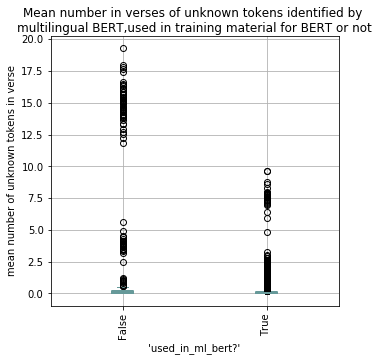

In [150]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "used_in_ml_bert?", rot = 90,
xlabel = "'used_in_ml_bert?'", ylabel = "mean number of unknown tokens in verse",
title = "Mean number in verses of unknown tokens identified by \nmultilingual BERT,used in training material for BERT or not",
figure_name = "unknown_tokens_bert", figsize = (5,5))


In [151]:
metadata.groupby("used_in_ml_bert?")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()


used_in_ml_bert?
True     0.175037
False    1.868013
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [152]:
metadata.groupby("used_in_ml_bert?")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()


used_in_ml_bert?
True     0.175037
False    1.868013
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [153]:
results_training_bert_unks_df = functions.test_differences_columns(metadata, "used_in_ml_bert?", "bert_multilingual_cased_count_unks_mean")

In [154]:
results_training_bert_unks_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,False,True,2.249791e-15,8.183735,1.868013,0.175037,***


### Correlation with Wikipedia's size

In [155]:
metadata.columns.tolist()[-20:]

['main writing system',
 'q-values',
 'Continent',
 'used_in_ml_bert?',
 'wikipedia_nr_articles_2021',
 'is_English?',
 'is_Romance_or_Germanic?',
 'bert_multilingual_cased_count_parts_tokens_median/characters_count_median',
 'bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median',
 'codebook',
 'title_English',
 'genre',
 'genre-multilabel',
 'wikid',
 'division',
 'original_language',
 'translation_period',
 'in_Latin_script?',
 'characters_count_mean/text_count_tokens_mean',
 'main writing system_colors']

In [156]:
languages_mean_df.head()

,language,macro family of languages,main writing system,index,year,number_verses_translation,number_chapters_translation,number_books_translation,text_count_tokens_mean,text_count_tokens_median,...,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,in_Latin_script?
0,Albanian,Albanian-Slavic-Romance-Germanic,Latin script,119.500000,0.000000,31102.000000,1189.000000,66.000000,28.675941,27.553030,...,1.678507,0.664223,0.009851,True,84162.0,False,False,0.144235,0.664876,True
2,Arabic,Semitic,Arabic alphabet,85.083969,0.000000,31101.496183,1189.000000,66.000000,16.457412,15.812977,...,4.326791,3.283510,0.000000,True,1140422.0,False,False,0.437399,3.294676,False
4,Azerbaijani,Turkic,Arabic alphabet,162.000000,0.000000,31102.000000,1189.000000,66.000000,18.533909,17.810606,...,3.192559,2.057189,0.000061,True,179494.0,False,False,0.326724,2.042516,False
5,Belarusian,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,235.000000,0.000000,31169.000000,1190.000000,66.000000,23.020679,22.121212,...,2.009111,1.023780,0.006454,True,209937.0,False,False,0.212890,1.020240,False
6,Bulgarian,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,147.806452,555.677419,24381.774194,919.290323,54.677419,24.135792,23.268817,...,1.717894,0.719718,0.004006,True,275867.0,False,False,0.152732,0.714378,False


c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


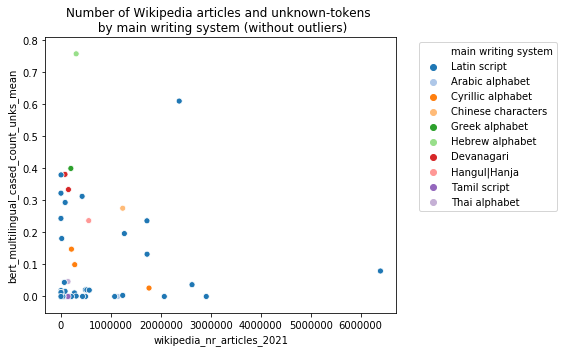

In [157]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (8,5), 
        column_color = "main writing system", title = "Number of Wikipedia articles and unknown-tokens \n by main writing system (without outliers)", outdir = "./../visualizations/", figure_name = "wikipedia_unknown_main_writing")

In [158]:
r, p = stats.pearsonr(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2]["bert_multilingual_cased_count_unks_mean"], languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2]["wikipedia_nr_articles_2021"])
print(r, p)

0.00960433568575679 0.9472212415014569


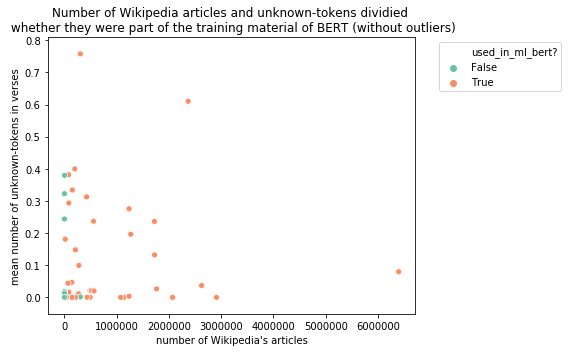

In [180]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (8,5),  xlabel = "number of Wikipedia's articles", ylabel = "mean number of unknown-tokens in verses",
        column_color = "used_in_ml_bert?", title = "Number of Wikipedia articles and unknown-tokens dividied \n whether they were part of the training material of BERT (without outliers)", palette = "Set2",
        outdir = "./../visualizations/", figure_name = "wikipedia_unknown_bert")

In [160]:
r, p = stats.pearsonr(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2) & ( languages_mean_df["used_in_ml_bert?"] == 1 )]["bert_multilingual_cased_count_parts_tokens_median"], languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2) & ( languages_mean_df["used_in_ml_bert?"] == 1 )]["wikipedia_nr_articles_2021"])
print(r, p)


-0.3825328395393265 0.01777558967956601


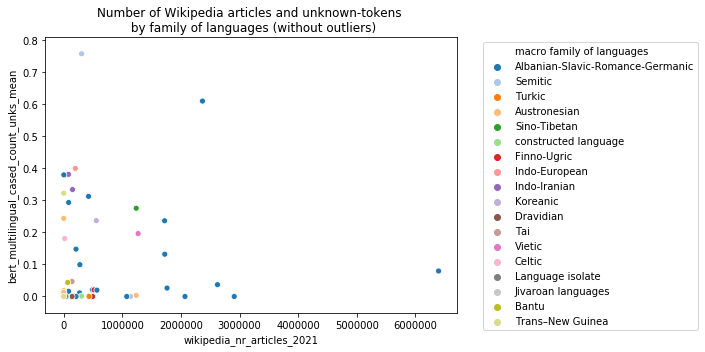

In [161]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (10,5), 
        column_color = "macro family of languages", title = "Number of Wikipedia articles and unknown-tokens \n by family of languages (without outliers)", 
        outdir = "./../visualizations/", figure_name = "wikipedia_unknown_family_language")

In [162]:
languages_mean_df.head(5)

,language,macro family of languages,main writing system,index,year,number_verses_translation,number_chapters_translation,number_books_translation,text_count_tokens_mean,text_count_tokens_median,...,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,in_Latin_script?
0,Albanian,Albanian-Slavic-Romance-Germanic,Latin script,119.500000,0.000000,31102.000000,1189.000000,66.000000,28.675941,27.553030,...,1.678507,0.664223,0.009851,True,84162.0,False,False,0.144235,0.664876,True
2,Arabic,Semitic,Arabic alphabet,85.083969,0.000000,31101.496183,1189.000000,66.000000,16.457412,15.812977,...,4.326791,3.283510,0.000000,True,1140422.0,False,False,0.437399,3.294676,False
4,Azerbaijani,Turkic,Arabic alphabet,162.000000,0.000000,31102.000000,1189.000000,66.000000,18.533909,17.810606,...,3.192559,2.057189,0.000061,True,179494.0,False,False,0.326724,2.042516,False
5,Belarusian,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,235.000000,0.000000,31169.000000,1190.000000,66.000000,23.020679,22.121212,...,2.009111,1.023780,0.006454,True,209937.0,False,False,0.212890,1.020240,False
6,Bulgarian,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,147.806452,555.677419,24381.774194,919.290323,54.677419,24.135792,23.268817,...,1.717894,0.719718,0.004006,True,275867.0,False,False,0.152732,0.714378,False


c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


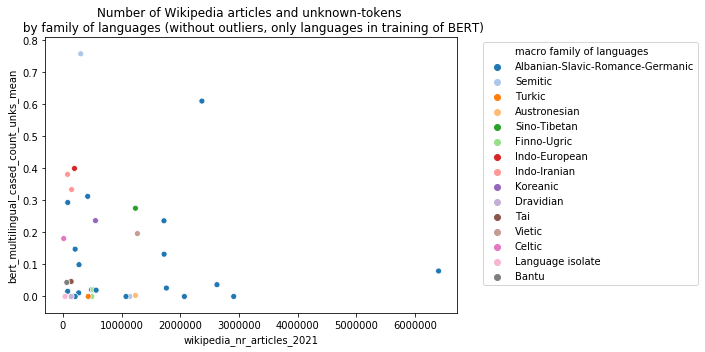

In [163]:
functions.plot_scatter_w_colors(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2) & (languages_mean_df["used_in_ml_bert?"] == 1) ],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (10,5), 
        column_color = "macro family of languages", title = "Number of Wikipedia articles and unknown-tokens \n by family of languages (without outliers, only languages in training of BERT)", 
        outdir = "./../visualizations/", figure_name = "wikipedia_unknown_family_language_bert")

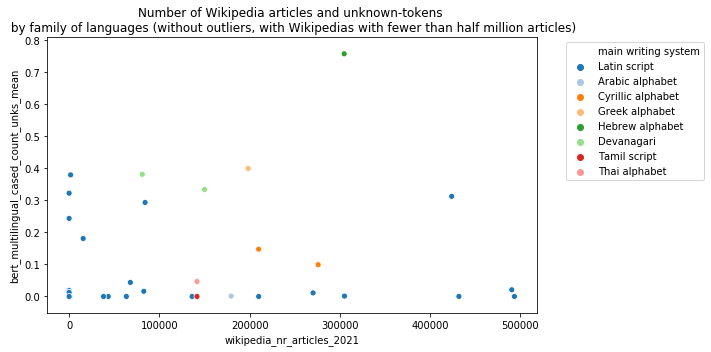

In [164]:
functions.plot_scatter_w_colors(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2) &  (languages_mean_df["wikipedia_nr_articles_2021"] < 500000)],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (10,5), 
        column_color = "main writing system", title = "Number of Wikipedia articles and unknown-tokens \n by family of languages (without outliers, with Wikipedias with fewer than half million articles)", 
        outdir = "./../visualizations/", figure_name = "wikipedia_unknown_wirting_system_fewer_half_million_articles")

In [165]:
languages_mean_df

,language,macro family of languages,main writing system,index,year,number_verses_translation,number_chapters_translation,number_books_translation,text_count_tokens_mean,text_count_tokens_median,...,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,in_Latin_script?
0,Albanian,Albanian-Slavic-Romance-Germanic,Latin script,119.500000,0.000000,31102.000000,1189.000000,66.000000,28.675941,27.553030,...,1.678507,0.664223,0.009851,True,84162.0,False,False,0.144235,0.664876,True
2,Arabic,Semitic,Arabic alphabet,85.083969,0.000000,31101.496183,1189.000000,66.000000,16.457412,15.812977,...,4.326791,3.283510,0.000000,True,1140422.0,False,False,0.437399,3.294676,False
4,Azerbaijani,Turkic,Arabic alphabet,162.000000,0.000000,31102.000000,1189.000000,66.000000,18.533909,17.810606,...,3.192559,2.057189,0.000061,True,179494.0,False,False,0.326724,2.042516,False
5,Belarusian,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,235.000000,0.000000,31169.000000,1190.000000,66.000000,23.020679,22.121212,...,2.009111,1.023780,0.006454,True,209937.0,False,False,0.212890,1.020240,False
6,Bulgarian,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,147.806452,555.677419,24381.774194,919.290323,54.677419,24.135792,23.268817,...,1.717894,0.719718,0.004006,True,275867.0,False,False,0.152732,0.714378,False
7,Cebuano,Austronesian,Latin script,10.500000,0.000000,31102.000000,1189.000000,66.000000,32.977582,31.655303,...,1.619997,0.618035,0.000113,True,1236636.0,False,False,0.121790,0.617788,True
9,Chinese,Sino-Tibetan,Chinese characters,9.000000,0.000000,31091.666667,1189.000000,66.000000,24.874645,23.803030,...,3.824402,0.000028,0.045660,True,1236636.0,False,False,0.000000,0.000000,False
12,Czech,Albanian-Slavic-Romance-Germanic,Latin script,213.731959,0.000000,29013.309278,1102.804124,62.381443,23.148852,22.350515,...,1.780856,0.798856,0.000897,True,490357.0,False,False,0.166282,0.790465,True
16,Danish,Albanian-Slavic-Romance-Germanic,Latin script,125.732283,1003.511811,30618.669291,1161.141732,63.598425,25.685205,24.618110,...,1.492657,0.489749,0.000449,True,270224.0,False,True,0.104639,0.481166,True
18,English,Albanian-Slavic-Romance-Germanic,Latin script,86.175796,1872.829724,26311.992781,1001.100637,57.526964,31.611053,30.111890,...,1.153023,0.171325,0.002634,True,6397642.0,True,True,0.035994,0.159967,True


# Older things

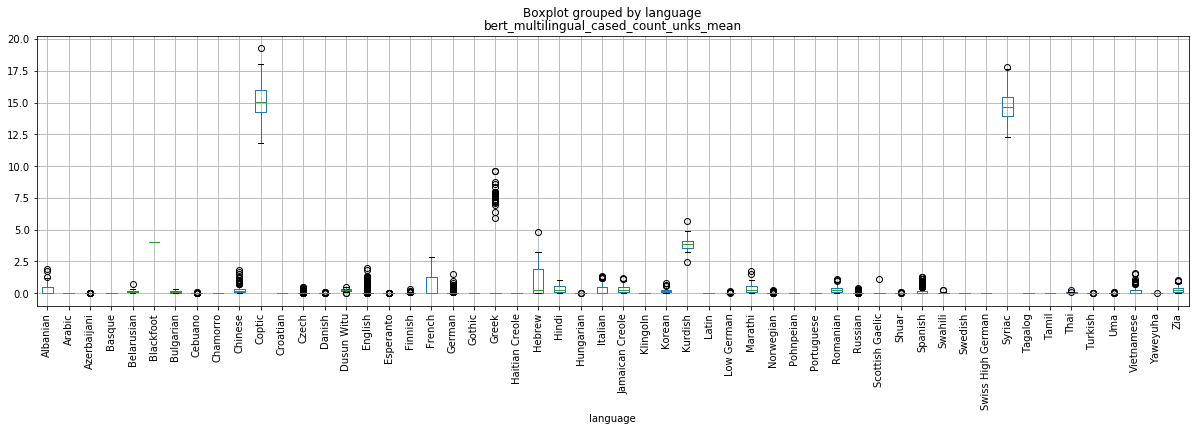

In [166]:
metadata.boxplot("bert_multilingual_cased_count_unks_mean",  by="language", figsize = [20,5], rot=90)
#plt.ylim((0,7))

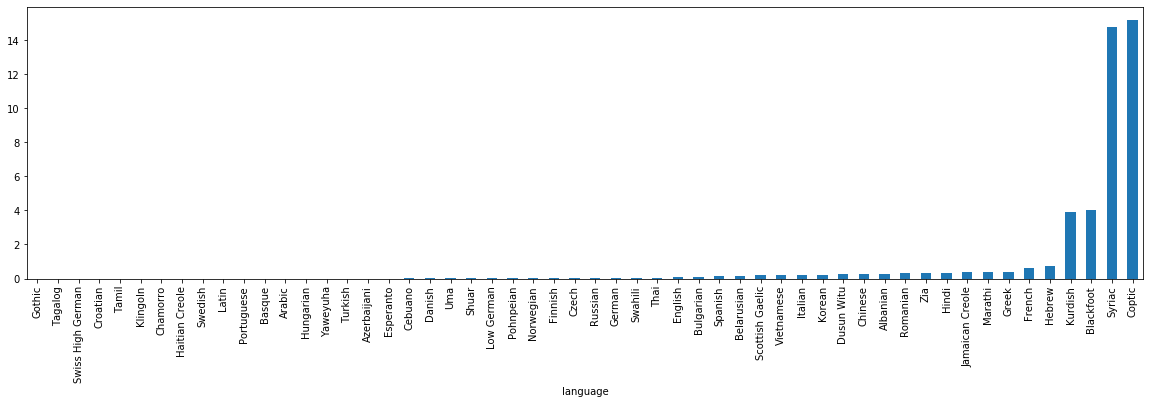

In [167]:
metadata.groupby("language")["bert_multilingual_cased_count_unks_mean"].mean().sort_values().plot.bar(figsize=(20,5))

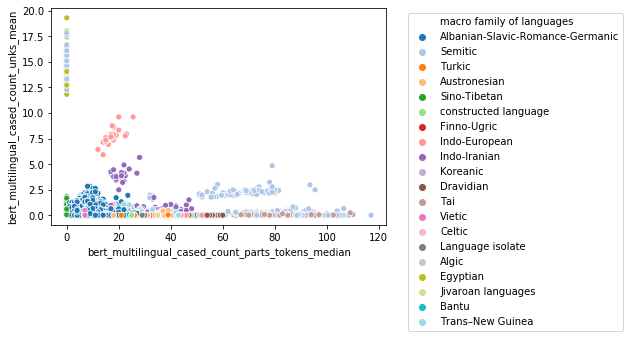

In [168]:
sns.scatterplot(x ="bert_multilingual_cased_count_parts_tokens_median", y = "bert_multilingual_cased_count_unks_mean",
hue = "macro family of languages", data = metadata.loc[(metadata["bert_multilingual_cased_count_tokens_median"] < 140) ],
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1, 
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

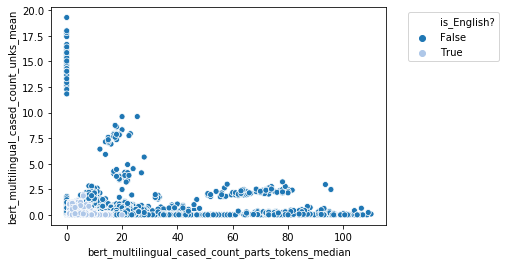

In [169]:
sns.scatterplot(x ="bert_multilingual_cased_count_parts_tokens_median", y = "bert_multilingual_cased_count_unks_mean",
hue = "is_English?", data = metadata.loc[(metadata["bert_multilingual_cased_count_tokens_mean"] < 140) ].sort_values(by="is_English?"),
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1, 
)


plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

(0, 7)

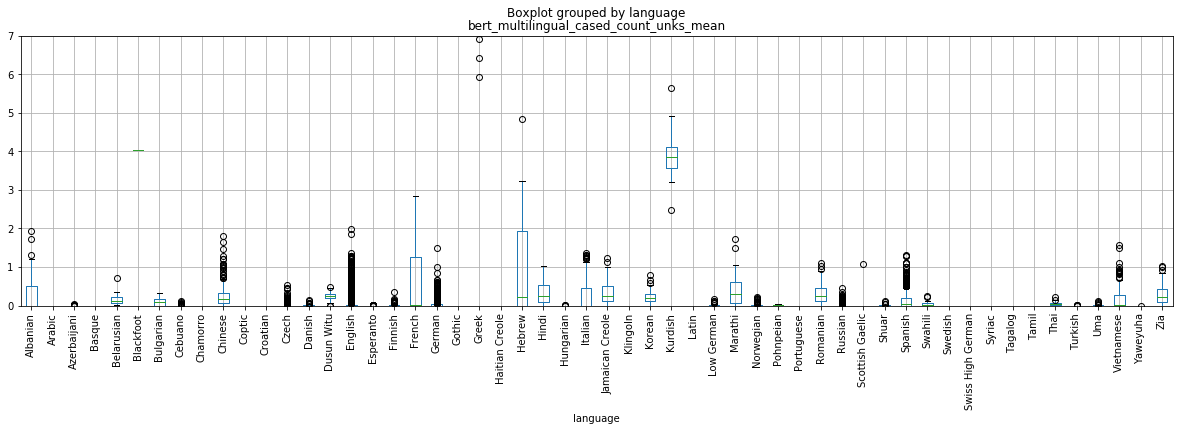

In [170]:
metadata.boxplot("bert_multilingual_cased_count_unks_mean",  by="language", figsize = [20,5], rot=90)
plt.ylim((0,7))

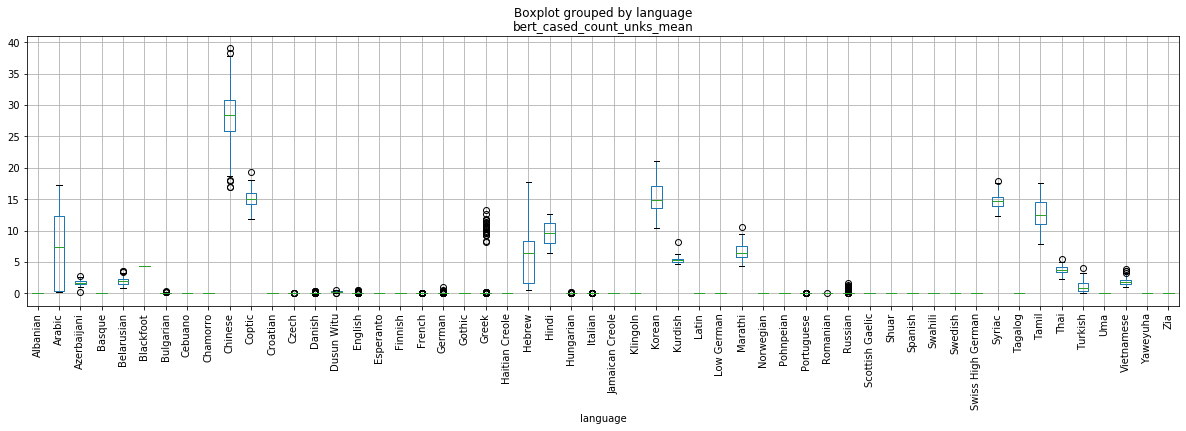

In [171]:
metadata.boxplot("bert_cased_count_unks_mean", by="language", figsize = [20,5], rot=90)
#plt.ylim((0,7))


In [172]:
colors_dc = {"ENG": "blue", "FRE": "red", "LAT": "orange", "SPA": "green", "ITA" : "pink"}

In [173]:
metadata["language_color"] = "gray"

In [174]:
metadata.loc[metadata["language"].isin(["ENG", "FRE", "LAT", "SPA", "ITA"]), "language_color"] = metadata["language"]

In [175]:
metadata["language_color"] = metadata["language_color"].map(colors_dc).fillna("gray")

In [176]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,genre,genre-multilabel,wikid,division,original_language,translation_period,in_Latin_script?,characters_count_mean/text_count_tokens_mean,main writing system_colors,language_color
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,4.516399,#1f77b4,gray
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,4.467251,#1f77b4,gray
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,7.817559,#aec7e8,gray
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,4.789461,#aec7e8,gray
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,5.730512,#aec7e8,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,3.897486,#1f77b4,gray
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,5.821854,#1f77b4,gray
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,2.893244,#1f77b4,gray
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,5.843772,#1f77b4,gray


In [177]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,genre,genre-multilabel,wikid,division,original_language,translation_period,in_Latin_script?,characters_count_mean/text_count_tokens_mean,main writing system_colors,language_color
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,4.516399,#1f77b4,gray
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,4.467251,#1f77b4,gray
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,7.817559,#aec7e8,gray
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,4.789461,#aec7e8,gray
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,5.730512,#aec7e8,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,3.897486,#1f77b4,gray
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,5.821854,#1f77b4,gray
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,2.893244,#1f77b4,gray
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,5.843772,#1f77b4,gray
